<a href="https://colab.research.google.com/github/Queebble/Unsupervised-Modern-Machine-Learning-Case-Study/blob/main/Copy_of_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# hydrogen.csv hydrogen_small.csv kick.csv Prepare_SQuAD_tiny.ipynb tfidf_features.csv tfidf_features_small.csv tsdm.csv

#Task 1

In [ ]:
df = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\tfidf_features.csv')
hydrogen = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\hydrogen.csv')
df.info

<bound method DataFrame.info of       aaa  aabb  aaron  aayog  aayushjs   ab  abate  abbas  abc  abcaustralia  \
0     0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
1     0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
2     0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
3     0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
4     0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
...   ...   ...    ...    ...       ...  ...    ...    ...  ...           ...   
2495  0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
2496  0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
2497  0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
2498  0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0   
2499  0.0   0.0    0.0    0.0       0.0  0.0    0.0    0.0  0.0           0.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(hydrogen['label'])

In [ ]:
# Prepare features
X = df
X

,aaa,aabb,aaron,aayog,aayushjs,ab,abate,abbas,abc,abcaustralia,...,zeroemissions,zhongtong,zi,zif,zimiz,zinc,zoneflow,zqke,zuurstof,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


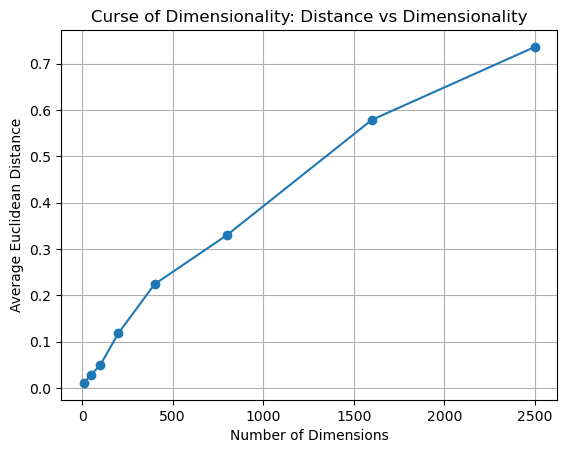

In [ ]:
from scipy.spatial.distance import pdist

X_mat = X.to_numpy()

dims = [10, 50, 100, 200, 400, 800, 1600, min(2500, X_mat.shape[1])]
mean_dists = []

for d in dims:
    cols = np.random.choice(X_mat.shape[1], size=d, replace=False)
    subset = X_mat[:, cols]
    dist = pdist(subset, metric='euclidean')
    mean_dists.append(np.mean(dist))

plt.plot(dims, mean_dists, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Euclidean Distance')
plt.title('Curse of Dimensionality: Distance vs Dimensionality')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X.values)
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2","PC3", "PC4"])
X_pca

,PC1,PC2,PC3,PC4
0,0.009873,-0.065350,-0.072455,0.142282
1,0.005538,-0.038650,-0.009503,-0.026668
2,-0.001786,-0.044120,0.067356,-0.056405
3,-0.060253,0.065836,-0.136420,-0.072618
4,-0.102259,0.124247,0.077410,0.074087
...,...,...,...,...
2495,0.003849,-0.027023,-0.020301,-0.019755
2496,0.012119,-0.036826,-0.036889,-0.026740
2497,0.008072,-0.045572,0.006327,0.003787
2498,-0.001140,-0.040256,0.007898,-0.024399


In [ ]:
X_pca.describe()

,PC1,PC2,PC3,PC4
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03
mean,2.327027e-17,7.887024e-17,-8.348877e-18,-3.588241e-17
std,9.173595e-02,8.566184e-02,6.712322e-02,6.573944e-02
min,-4.540589e-01,-1.245626e-01,-4.074282e-01,-3.699586e-01
25%,-1.292530e-02,-4.394682e-02,-2.247690e-02,-2.680983e-02
50%,3.823965e-03,-3.373101e-02,-4.562600e-03,-2.955779e-03
75%,9.659474e-03,3.779323e-03,2.833172e-02,1.130088e-02
max,7.028204e-01,6.298120e-01,3.038160e-01,3.861834e-01


In [ ]:
print(pca.explained_variance_ratio_)

[0.00848973 0.00740269 0.00454528 0.0043598 ]


In [ ]:
print("Total explained variance with 4 components:", sum(pca.explained_variance_ratio_))

Total explained variance with 4 components: 0.024797511794425117


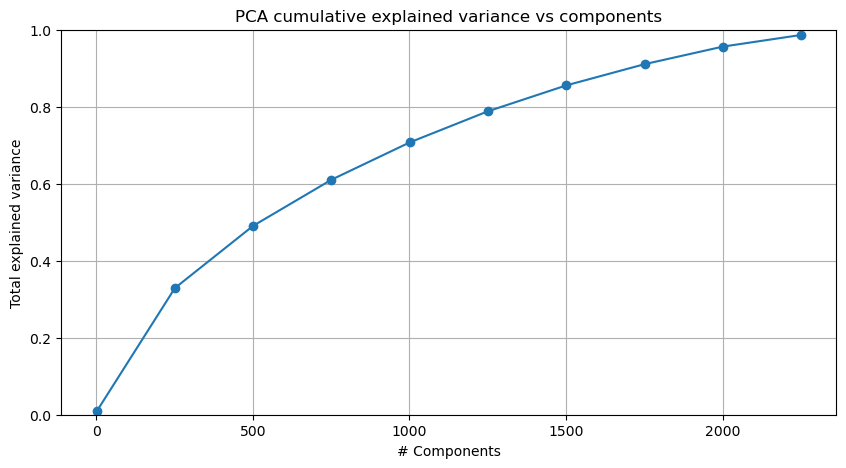

In [ ]:
# Create a range of components to test (10 to 50)
comps_num = np.arange(1, 2500+1, 250)

comps_variance = []
for k in comps_num:
    pca = PCA(n_components=k, random_state=10)
    pca.fit(X.values)
    comps_variance.append(pca.explained_variance_ratio_.sum())

# Plot cumulative explained variance
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(comps_num, comps_variance, marker='o')
plt.xlabel('# Components')
plt.ylabel('Total explained variance')
plt.title('PCA cumulative explained variance vs components')
plt.ylim(0, 1.0)
plt.show()

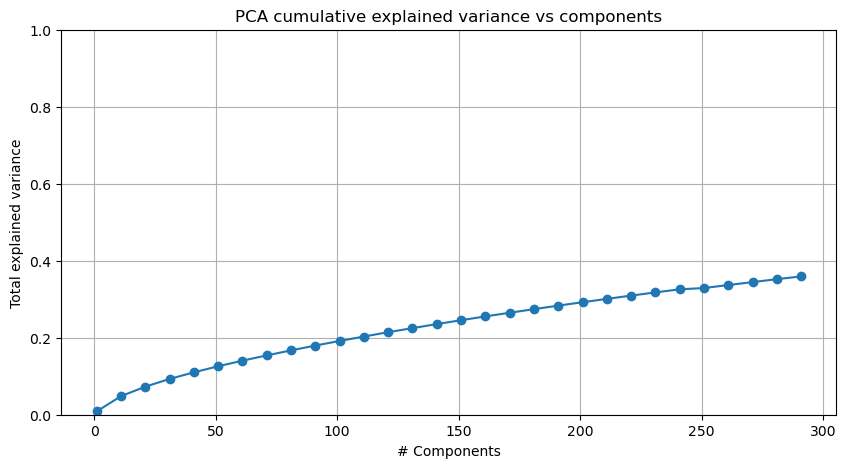

In [ ]:
from sklearn.decomposition import PCA
# Create a range of components to test (10 to 50)
comps_num = np.arange(1, 300+1, 10)

comps_variance = []
for k in comps_num:
    pca = PCA(n_components=k, random_state=10)
    pca.fit(X.values)
    comps_variance.append(pca.explained_variance_ratio_.sum())

# Plot cumulative explained variance
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(comps_num, comps_variance, marker='o')
plt.xlabel('# Components')
plt.ylabel('Total explained variance')
plt.title('PCA cumulative explained variance vs components')
plt.ylim(0, 1)
plt.show()

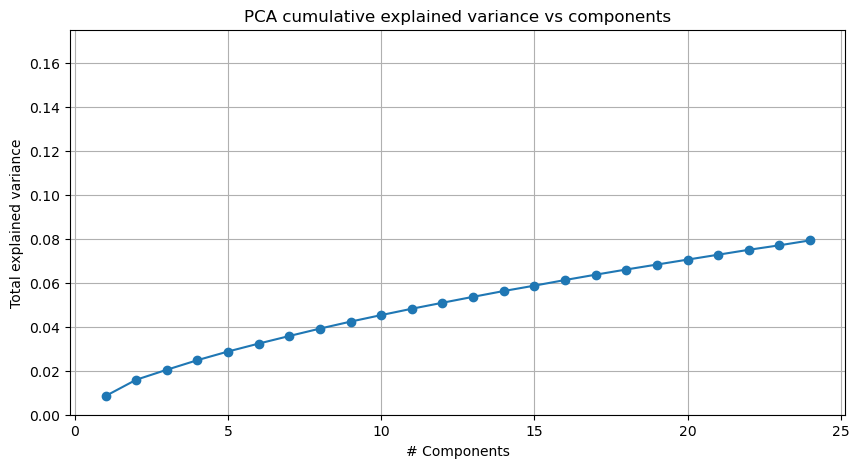

In [ ]:
from sklearn.decomposition import PCA
# Create a range of components to test (10 to 50)
comps_num = np.arange(1, 25, 1)

comps_variance = []
for k in comps_num:
    pca = PCA(n_components=k, random_state=10)
    pca.fit(X.values)
    comps_variance.append(pca.explained_variance_ratio_.sum())

# Plot cumulative explained variance
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(comps_num, comps_variance, marker='o')
plt.xlabel('# Components')
plt.ylabel('Total explained variance')
plt.title('PCA cumulative explained variance vs components')
plt.ylim(0, 0.175)
plt.show()

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X.values)

In [ ]:
print(pca.explained_variance_ratio_)

[0.00848973 0.0074027  0.00454521 0.00435986 0.00393756]


In [ ]:
print("Total explained variance with 5 components:", sum(pca.explained_variance_ratio_))

Total explained variance with 5 components: 0.028735062366867452


In [ ]:
pca = PCA(n_components=2000)
X_pca = pca.fit_transform(X.values)

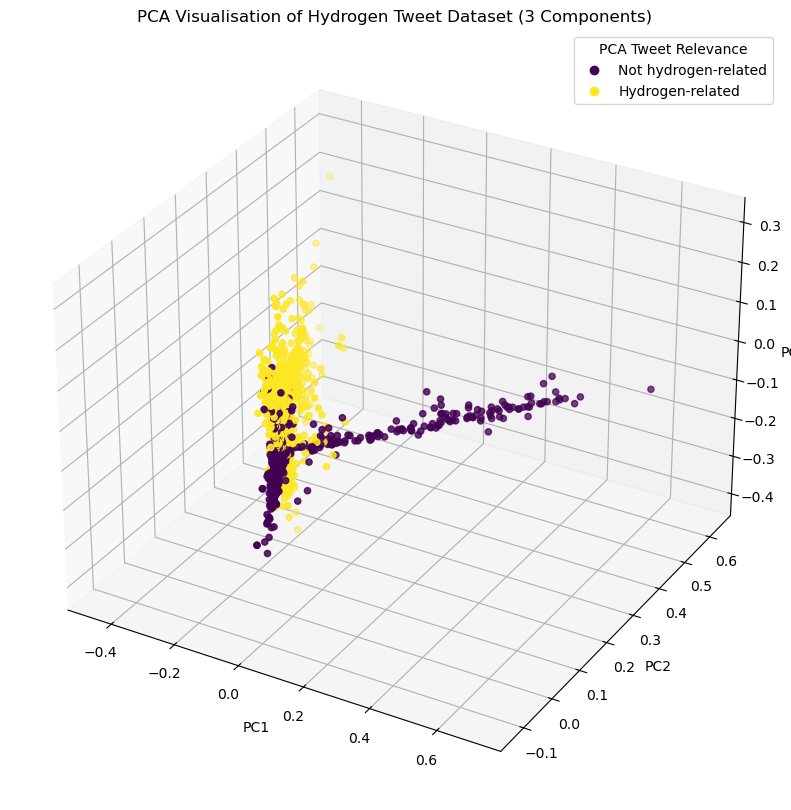

In [ ]:
# We can't use `plt.scatter()` directly as that only works for 2D, so first create a 3D subplot.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# Now we can create the scatterplot.
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, s=20)

ax.legend(
    handles=scatter.legend_elements()[0],
    labels=["Not hydrogen-related", "Hydrogen-related"],
    title="PCA Tweet Relevance"
)
ax.set_title("PCA Visualisation of Hydrogen Tweet Dataset (3 Components)")
ax.set(xlabel="PC1", ylabel="PC2", zlabel="PC3")

plt.show()

In [ ]:
pca_2000 = PCA(n_components=2000, random_state=10)
X_pca2000 = pca_2000.fit_transform(X.values)

In [ ]:
from sklearn.manifold import TSNE
random_state = 10
tsne = TSNE(n_components=2, random_state=random_state)
tsne.fit(X_pca2000)

C:\Users\stevi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\stevi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\stevi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\stevi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\stevi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

TSNE(random_state=10)

In [ ]:
print("KL divergence for 2 components:", tsne.kl_divergence_)

KL divergence for 2 components: 2.6976146697998047


In [ ]:
# Create an array containing the numbers 1 through 3 inclusive, this will also be our X values.
tsne_comps_num = np.arange(1, 3+1)
tsne_comps_divergence = []
for num_components in tsne_comps_num:
  # Fit a PCA model to the specified number of components.
  tsne = TSNE(n_components=num_components, random_state=random_state)
  tsne.fit(X_pca2000)
  tsne_comps_divergence.append(tsne.kl_divergence_)
  print(f"KL Divergence for {num_components}: {tsne.kl_divergence_}")

KL Divergence for 1: 3.620755910873413
KL Divergence for 2: 2.6976146697998047
KL Divergence for 3: 2.640423536300659


In [ ]:
# Perplexity must range between 5 and 50. Use steps of 5, as computing with an interval of 1 would take too long.
tsne_perplexity_num = np.arange(5, 50+1, 5)
tsne_perplexity_divergence = []
for perplexity in tsne_perplexity_num:
  # Fit a TSNE model to the specified number of components.
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
  tsne.fit(X_pca2000)
  tsne_perplexity_divergence.append(tsne.kl_divergence_)
  print(f"KL Divergence for perplexity of {perplexity}: {tsne.kl_divergence_}")

KL Divergence for perplexity of 5: 2.547314167022705
KL Divergence for perplexity of 10: 2.7718422412872314
KL Divergence for perplexity of 15: 2.8136484622955322
KL Divergence for perplexity of 20: 2.8042759895324707
KL Divergence for perplexity of 25: 2.7284576892852783
KL Divergence for perplexity of 30: 2.6976146697998047
KL Divergence for perplexity of 35: 2.6625733375549316
KL Divergence for perplexity of 40: 2.65632700920105
KL Divergence for perplexity of 45: 2.5982348918914795
KL Divergence for perplexity of 50: 2.5536231994628906


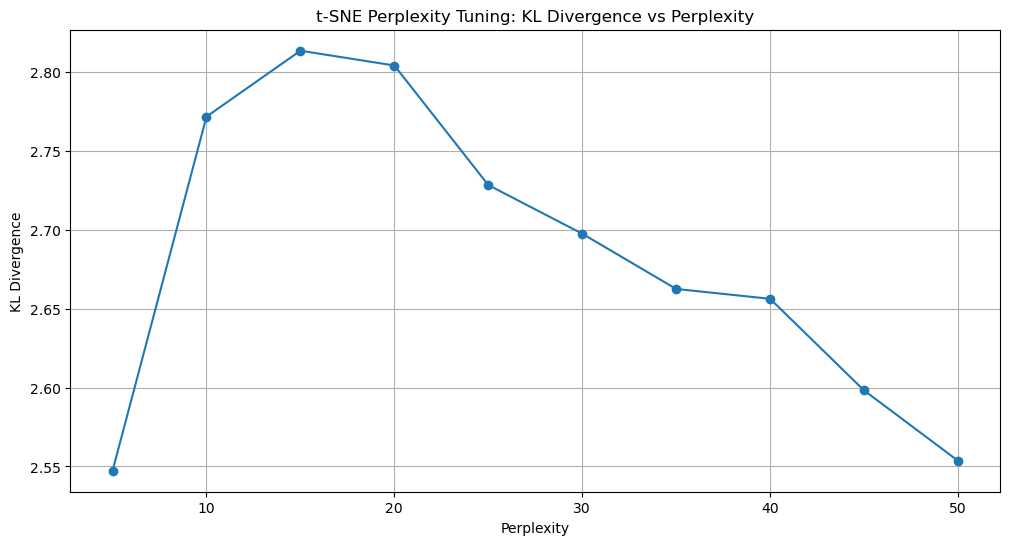

In [ ]:
# Add grid lines to improve visibility.
plt.figure(1, figsize=(12, 6))
plt.grid()
# Plot each of the data points, using a circular marker.
plt.plot(tsne_perplexity_num, tsne_perplexity_divergence, marker='o')
# Set the X axis to our component range, and the Y axis limits from 0 to 1 (as variance is a ratio between 0 and 1).
plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")
plt.title("t-SNE Perplexity Tuning: KL Divergence vs Perplexity")
plt.show()

In [ ]:
tsne = TSNE(n_components=3, perplexity=5, random_state=random_state)
X_tsne = tsne.fit_transform(X_pca2000)

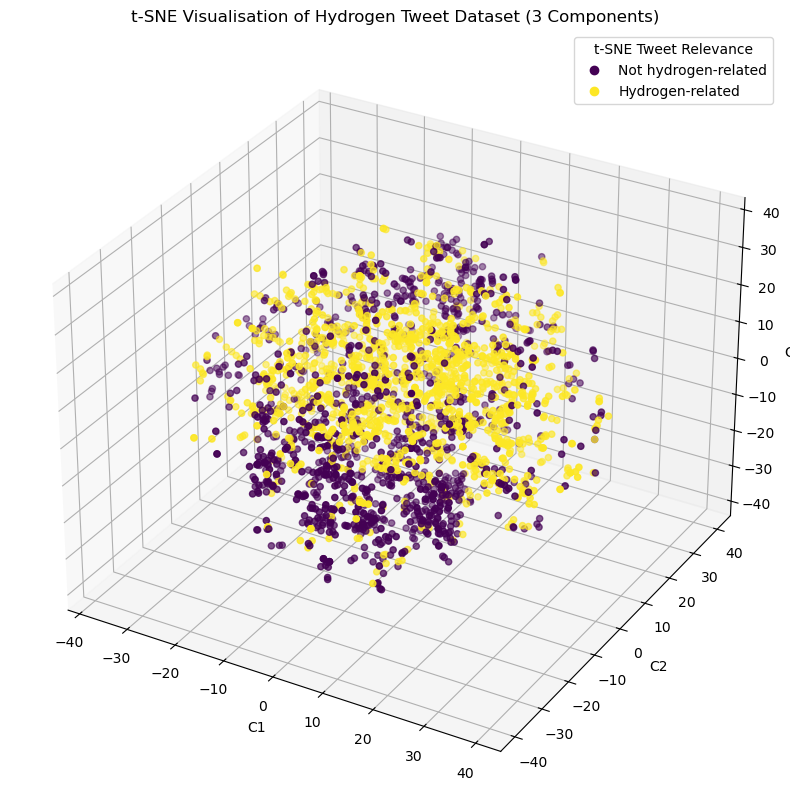

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, s=20)
ax.legend(
    handles=scatter.legend_elements()[0],
    labels=["Not hydrogen-related", "Hydrogen-related"],
    title="t-SNE Tweet Relevance"
)
ax.set(xlabel="C1", ylabel="C2", zlabel="C3")
ax.set_title("t-SNE Visualisation of Hydrogen Tweet Dataset (3 Components)")
plt.show()

# Task 2

In [ ]:
# Function to inspect Qualitative variable with simple plot and basic statistics
def inspect_qualitative_variable(df, column):
    print(f"\n=== {column} ===")

    # Calculate basic statistics
    total = len(df)                                  # Total number of records
    missing = df[column].isnull().sum()              # Count of missing (NaN) values
    unique_vals = df[column].nunique(dropna=True)    # Number of unique categories (excluding NaN)

    # Print summary statistics
    print(f"Total values       : {total}")
    print(f"Missing values     : {missing}")
    print(f"Unique categories  : {unique_vals}")
    print("\nValue counts:")
    print(df[column].value_counts(dropna=False))     # Print count of each category including NaN

    # Plot count distribution as a bar chart
    plt.figure(figsize=(8, 5))                        # Set plot size
    sns.countplot(
        data=df,
        x=column,
        hue=column,                                   # Apply color separation by the same variable
        order=df[column].value_counts().index,        # Display bars in descending order of frequency
        palette='pastel'                              # Use a pastel color palette
    )
    plt.title(f'{column} Distribution')               # Set plot title
    plt.xlabel(column.capitalize())                   # Label x-axis with column name
    plt.ylabel('Count')                               # Label y-axis
    plt.xticks(rotation=45)                           # Rotate x-axis labels for readability
    plt.tight_layout()                                # Adjust layout to prevent overlap
    plt.show()                                        # Display the plot

In [ ]:
# Define a function to inspect a Quantitative variable in a DataFrame
def inspect_quantitative_variable(df, column):
    print(f"\n=== {column} ===")

    # Calculate basic statistics
    total = len(df)                                  # Total number of entries
    missing = df[column].isnull().sum()              # Count of missing values
    negative = (df[column] < 0).sum()                # Count of negative values
    zero = (df[column] == 0).sum()                   # Count of zero values
    min_val = df[column].min()                       # Minimum value
    max_val = df[column].max()                       # Maximum value
    mean = df[column].mean()                         # Mean of the column
    median = df[column].median()                     # Median of the column
    std = df[column].std()                           # Standard deviation

    # Print the calculated statistics
    print(f"Total values     : {total}")
    print(f"Missing values   : {missing}")
    print(f"Negative values  : {negative}")
    print(f"Zero values      : {zero}")
    print(f"Min              : {min_val}")
    print(f"Max              : {max_val}")
    print(f"Mean             : {mean:.2f}")
    print(f"Median           : {median:.2f}")
    print(f"Std. Deviation   : {std:.2f}")

    # Visualise the distribution of values using a histogram and boxplot
    plt.figure(figsize=(12, 4))                      # Set up a wide figure for side-by-side plots

    # Plot histogram with KDE (kernel density estimate)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins='auto', color='steelblue')  # Automatically choose bin size
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Plot boxplot to show spread and potential outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    # Adjust layout to prevent overlap and display the plots
    plt.tight_layout()
    plt.show()

In [ ]:
# hydrogen.csv hydrogen_small.csv kick.csv Prepare_SQuAD_tiny.ipynb tfidf_features.csv tfidf_features_small.csv tsdm.csv
kickdf = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\kick.csv')

In [ ]:
kickdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   VehOdo                             41409 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64 
 2   Make                               41409 non-null  object
 3   WarrantyCost                       41409 non-null  int64 
 4   IsBadBuy                           41409 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


In [ ]:
# get more information from VehOdo
print(kickdf['VehOdo'].describe())
print(kickdf['VehOdo'].value_counts())

count     41409.000000
mean      71299.961868
std       14723.019112
min         577.000000
25%       61586.000000
50%       73128.000000
75%       82256.000000
max      480444.000000
Name: VehOdo, dtype: float64
VehOdo
83962    6
67464    6
79600    6
76867    6
80612    6
        ..
78038    1
70239    1
76468    1
89897    1
66855    1
Name: count, Length: 28599, dtype: int64


In [ ]:
# get more information from VehOdo
print(kickdf['MMRAcquisitionAuctionAveragePrice'].describe())
print(kickdf['MMRAcquisitionAuctionAveragePrice'].value_counts())

# why is there a 0

count    41409.000000
mean      6135.010433
std       2481.223003
min          0.000000
25%       4273.000000
50%       6105.000000
75%       7783.000000
max      33543.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64
MMRAcquisitionAuctionAveragePrice
0        502
5480     205
6311      96
7811      79
7644      74
        ... 
10099      1
9971       1
9761       1
10363      1
7535       1
Name: count, Length: 9270, dtype: int64



=== MMRAcquisitionAuctionAveragePrice ===
Total values     : 41409
Missing values   : 0
Negative values  : 0
Zero values      : 502
Min              : 0
Max              : 33543
Mean             : 6135.01
Median           : 6105.00
Std. Deviation   : 2481.22


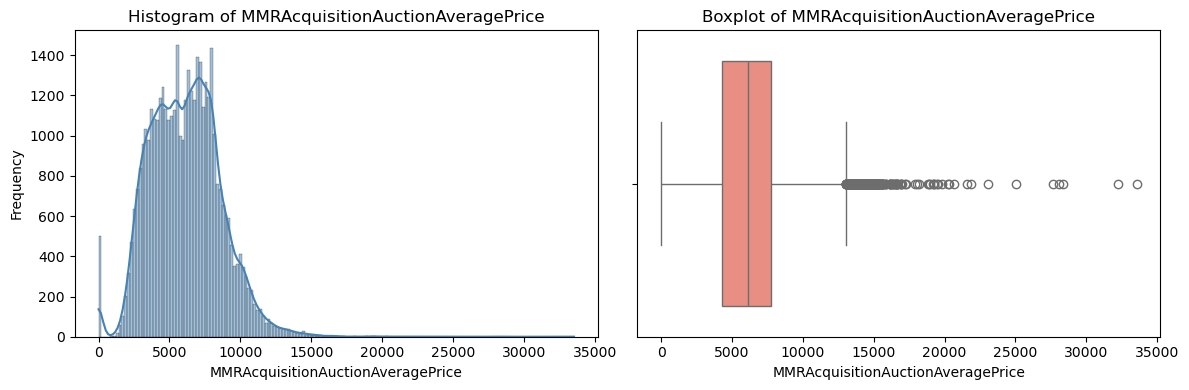

In [ ]:
inspect_quantitative_variable(kickdf, 'MMRAcquisitionAuctionAveragePrice')
#Zero values      : 502

In [ ]:
# replace '0' with NaN as 0 is technically a blank entry
kickdf['MMRAcquisitionAuctionAveragePrice'] = kickdf['MMRAcquisitionAuctionAveragePrice'].replace([0], pd.NA)

# finally for this variable there are many "0" so I need to impute them with the median as the data is quite skewed
kickdf['MMRAcquisitionAuctionAveragePrice'] = (
    kickdf['MMRAcquisitionAuctionAveragePrice']
    .fillna(round(kickdf['MMRAcquisitionAuctionAveragePrice'].median()))
    .astype('int64')
)

C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\1217389667.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(round(kickdf['MMRAcquisitionAuctionAveragePrice'].median()))



=== MMRAcquisitionAuctionAveragePrice ===
Total values     : 41409
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 884
Max              : 33543
Mean             : 6209.57
Median           : 6150.00
Std. Deviation   : 2386.34


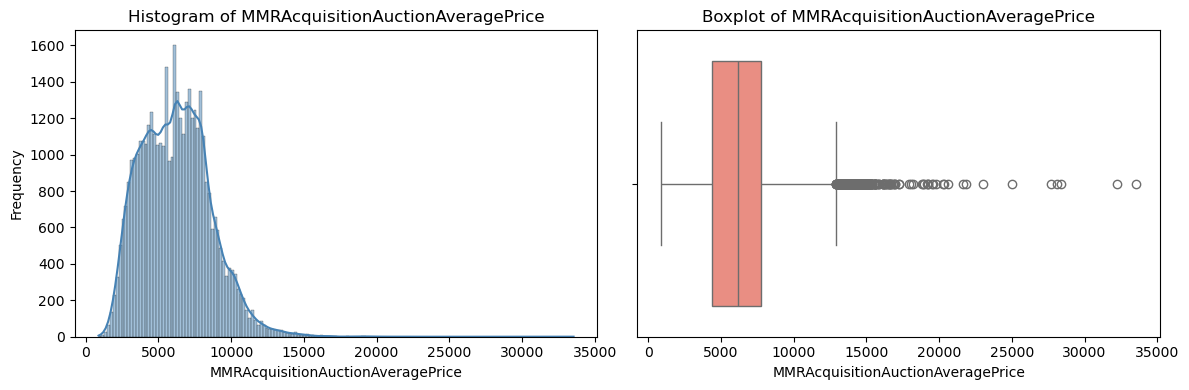

In [ ]:
inspect_quantitative_variable(kickdf, 'MMRAcquisitionAuctionAveragePrice')

In [ ]:
# get more information from VehOdo
print(kickdf['Make'].describe())
print(kickdf['Make'].value_counts())

count         41409
unique           30
top       CHEVROLET
freq           9544
Name: Make, dtype: object
Make
CHEVROLET     9544
DODGE         7379
FORD          6456
CHRYSLER      5257
PONTIAC       2353
KIA           1337
SATURN        1245
NISSAN        1185
JEEP           984
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     568
MAZDA          532
MERCURY        526
BUICK          412
GMC            350
HONDA          262
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: count, dtype: int64


In [ ]:
print(kickdf['Make'].unique())

['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']


In [ ]:
# get more information from VehOdo
print(kickdf['WarrantyCost'].describe())
print(kickdf['WarrantyCost'].value_counts())

count    41409.000000
mean      1273.011809
std        599.223703
min        462.000000
25%        834.000000
50%       1155.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64
WarrantyCost
920     1667
1974    1336
2152    1207
1215    1183
1389    1166
        ... 
4437       1
7498       1
2230       1
683        1
7198       1
Name: count, Length: 271, dtype: int64


In [ ]:
# get more information from VehOdo
print(kickdf['IsBadBuy'].describe())
print(kickdf['IsBadBuy'].value_counts())

count    41409.000000
mean         0.129537
std          0.335797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IsBadBuy, dtype: float64
IsBadBuy
0    36045
1     5364
Name: count, dtype: int64


In [ ]:
kickdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   VehOdo                             41409 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64 
 2   Make                               41409 non-null  object
 3   WarrantyCost                       41409 non-null  int64 
 4   IsBadBuy                           41409 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler
# take 3 variables and drop the rest. copy the dataframe to avoid warnings later
kickdf2 = kickdf[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']].copy()
# convert df2 to matrix
X = kickdf2.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

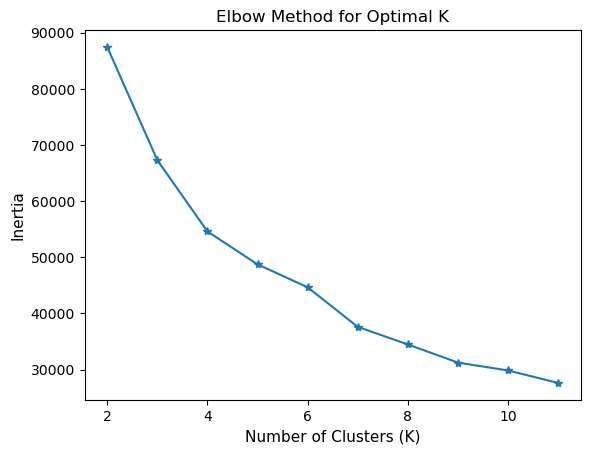

In [ ]:
from sklearn.cluster import KMeans
# list to save the clusters and cost
clusters = []
inertia_vals = []
for k in range(2, 12, 1):
 # train clustering with the specified K
 model = KMeans(n_clusters=k, random_state=random_state)
 model.fit(X)

 # append model to cluster list
 clusters.append(model)
 inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2,12,1), inertia_vals, marker='*')
plt.title("Elbow Method for Optimal K", fontsize=12)
plt.xlabel("Number of Clusters (K)", fontsize=11)
plt.ylabel("Inertia", fontsize=11)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print(clusters[0])
print("Silhouette score for k=2", silhouette_score(X, clusters[0].predict(X)))
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X, clusters[2].predict(X)))

KMeans(n_clusters=2, random_state=10)
Silhouette score for k=2 0.28151360506025724
KMeans(n_clusters=3, random_state=10)
Silhouette score for k=3 0.2898522056070864
KMeans(n_clusters=4, random_state=10)
Silhouette score for k=4 0.28646190625128376


In [ ]:
from sklearn.cluster import KMeans
random_state = 10
# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
 print(centroid)

Sum of intra-cluster distance: 67318.55548678686
Centroid locations:
[ 0.67992113 -0.79530332  0.53334632]
[-0.97406247 -0.12457598 -0.66985474]
[0.45939213 1.02490339 0.24389628]


Sum of intra-cluster distance: 67318.55548678685
Centroid locations:
[ 0.67992113 -0.79530332  0.53334632]
[-0.97406247 -0.12457598 -0.66985474]
[0.45939213 1.02490339 0.24389628]
Cluster_ID
1    15318
0    13667
2    12424
Name: count, dtype: int64


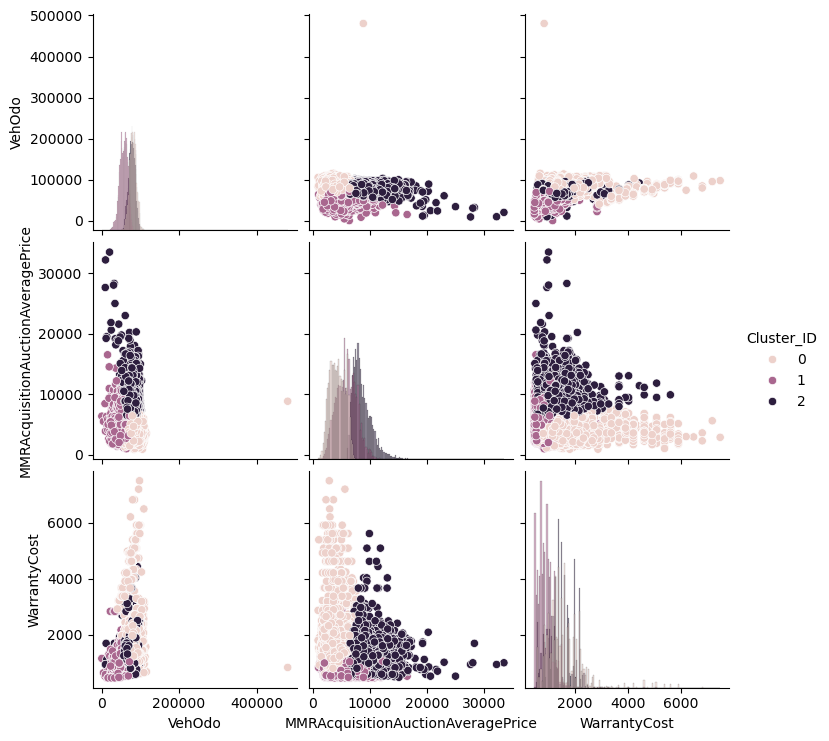

In [ ]:
# set a different n_clusters
model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
 print(centroid)
# add column for cluster ID to data
y = model.predict(X)
kickdf2['Cluster_ID'] = y
# how many in each?
print(kickdf2['Cluster_ID'].value_counts())
# pairplot
cluster_g = sns.pairplot(kickdf2, hue='Cluster_ID', diag_kind='hist')
plt.show()


In [ ]:
def inspect_clusters(df, cols, clusters_to_inspect):
 # prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
    n_bins = 20

    for cluster in clusters_to_inspect:
        print(f"Distribution for cluster {cluster}")

        # create subplots
        fig, ax = plt.subplots(nrows=len(cols), figsize=(6, 10))
        fig.suptitle(f"Cluster {cluster}", fontsize=14)

        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(df[col].min(), df[col].max(), n_bins)

            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col],
                         bins=bins, ax=ax[j], kde=True, stat="density")

            # plot the normal distribution with a black line
            sns.kdeplot(df[col], ax=ax[j], color='k')

            ax[j].set_xlabel(col)
            ax[j].legend()

        plt.tight_layout()
        plt.show()

Distribution for cluster 0


C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()


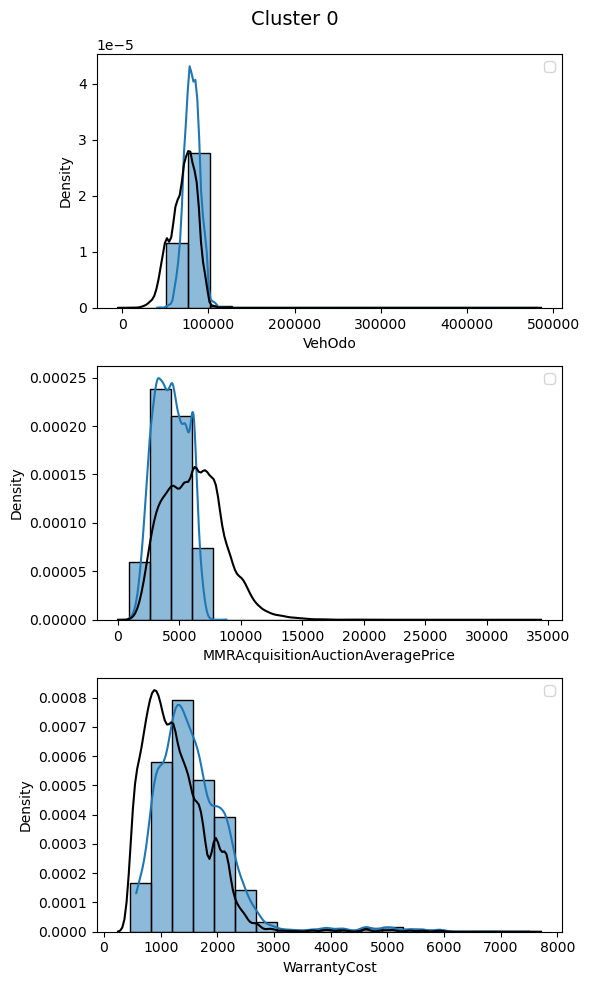

Distribution for cluster 1


C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()


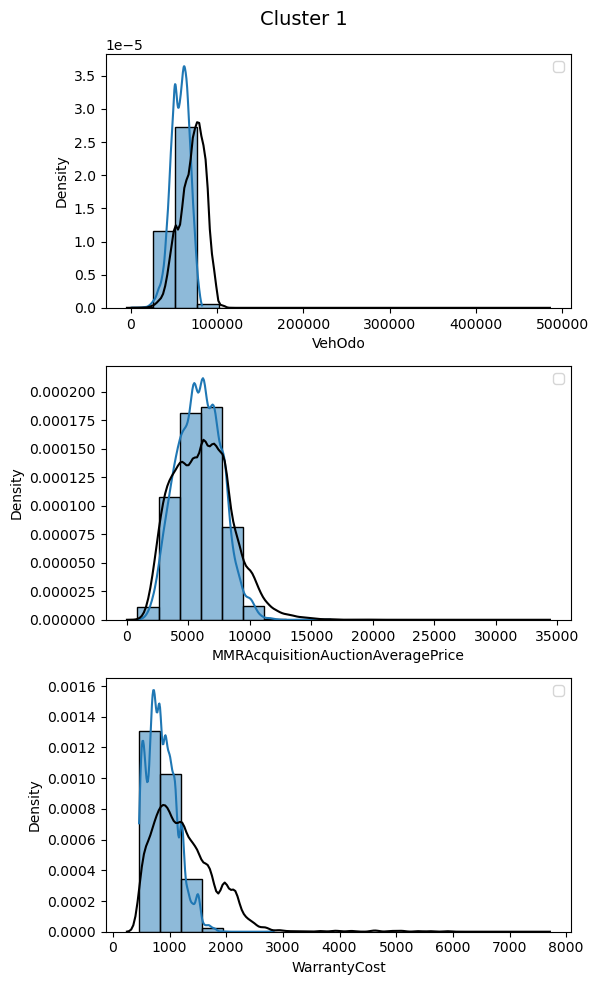

Distribution for cluster 2


C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()
C:\Users\stevi\AppData\Local\Temp\ipykernel_67228\753260892.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend()


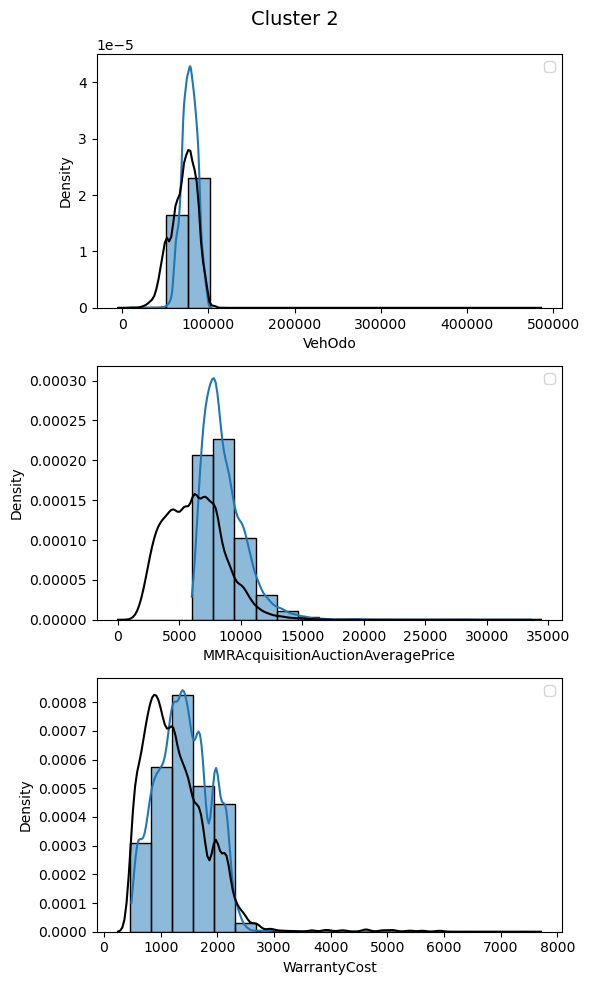

In [ ]:
inspect_clusters(kickdf2, ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost'], [0, 1, 2])


In [ ]:
# One-hot encode the 'make' column
make_dummies = pd.get_dummies(kickdf['Make'], prefix='Make')
kickdf3 = pd.concat([kickdf2, make_dummies], axis=1)

kickdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   VehOdo                             41409 non-null  int64
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64
 2   WarrantyCost                       41409 non-null  int64
 3   Cluster_ID                         41409 non-null  int32
 4   Make_ACURA                         41409 non-null  bool 
 5   Make_BUICK                         41409 non-null  bool 
 6   Make_CADILLAC                      41409 non-null  bool 
 7   Make_CHEVROLET                     41409 non-null  bool 
 8   Make_CHRYSLER                      41409 non-null  bool 
 9   Make_DODGE                         41409 non-null  bool 
 10  Make_FORD                          41409 non-null  bool 
 11  Make_GMC                           41409 non-null  bool 
 12  Make_HONDA        

In [ ]:
# Select only numeric columns for clustering
X3 = kickdf3.drop(columns=['Cluster_ID'])

# Standardise
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)
X3_scaled = pd.DataFrame(X3_scaled, columns=X3.columns)


X3_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehOdo                             41409 non-null  float64
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  float64
 2   WarrantyCost                       41409 non-null  float64
 3   Make_ACURA                         41409 non-null  float64
 4   Make_BUICK                         41409 non-null  float64
 5   Make_CADILLAC                      41409 non-null  float64
 6   Make_CHEVROLET                     41409 non-null  float64
 7   Make_CHRYSLER                      41409 non-null  float64
 8   Make_DODGE                         41409 non-null  float64
 9   Make_FORD                          41409 non-null  float64
 10  Make_GMC                           41409 non-null  float64
 11  Make_HONDA                         41409 non-null  flo

In [ ]:
from sklearn.cluster import KMeans
random_state = 10
# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X3_scaled)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
 print(centroid)

Sum of intra-cluster distance: 1274089.0422147482
Centroid locations:
[ 0.06365629 -0.13921222  0.1170202   0.03256709  0.15237805 -0.02026592
 -0.54727833  0.57963242 -0.46565876  0.65309723 -0.09232724 -0.07979608
 -0.15381049 -0.02554325 -0.04454408 -0.15601722 -0.18266073 -0.01772117
 -0.0361354  -0.11408179  0.17241353  0.03256709 -0.11793046 -0.17163923
  0.09041612  0.37309285  0.26761845 -0.04316206 -0.02026592 -0.14406869
 -0.12765766 -0.04202398 -0.01702575]
[-0.03202654  0.11531683 -0.04581452 -0.02142541 -0.10024727  0.01467128
  0.39619579 -0.38133163  0.33710825 -0.42965864  0.06683923  0.05776745
 -0.15381049  0.01849174  0.03224717  0.11294685  0.13223512  0.01282904
  0.0261598   0.08258818 -0.11342832 -0.02142541  0.08537439  0.12425622
 -0.05948343 -0.24545229 -0.17606223  0.03124667  0.01467128  0.10429685
  0.09241628  0.03042277  0.01232559]
[-0.28915636 -0.50404917 -0.85936379 -0.02142541 -0.10024727 -0.02026592
 -0.54727833 -0.38133163 -0.46565876 -0.4297734  -0

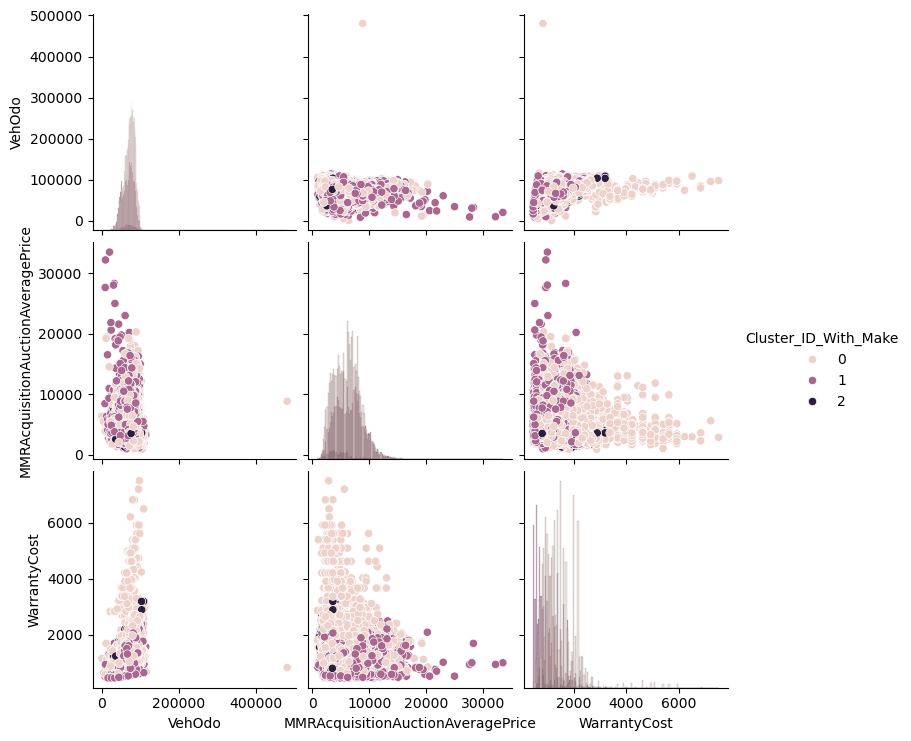

In [ ]:
# fit KMeans
model = KMeans(n_clusters=3, random_state=random_state).fit(X3_scaled)

# attach cluster IDs to kickdf3
kickdf3['Cluster_ID_With_Make'] = model.labels_

# pairplot only for the 3 continuous features
sns.pairplot(
    kickdf3,
    vars=['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost'],
    hue='Cluster_ID_With_Make',
    diag_kind='hist',
)
plt.show()


#Task 3

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA:", torch.version.cuda)
    print("GPU:", torch.cuda.get_device_name(0))


CUDA available: True
CUDA: 11.8
GPU: NVIDIA GeForce RTX 3080


In [ ]:
# hydrogen.csv hydrogen_small.csv kick.csv Prepare_SQuAD_tiny.ipynb tfidf_features.csv tfidf_features_small.csv tsdm.csv
tsdmdf = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\tsdm.csv')

In [ ]:
tsdmdf.info()
tsdmdf.isnull().sum()
# observation date is appearing as object rather than datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PADDOCK_ID          3691 non-null   object 
 1   OBSERVATION_DATE    3691 non-null   object 
 2   TSDM                3691 non-null   float64
 3   15D_AVG_DAILY_RAIN  3691 non-null   float64
 4   15D_AVG_MAX_TEMP    3691 non-null   float64
 5   15D_AVG_MIN_TEMP    3691 non-null   float64
 6   15D_AVG_RH_TMAX     3691 non-null   float64
 7   15D_AVG_RH_TMIN     3691 non-null   float64
 8   15D_AVG_EVAP_SYN    3691 non-null   float64
 9   15D_AVG_RADIATION   3691 non-null   float64
dtypes: float64(8), object(2)
memory usage: 288.5+ KB


PADDOCK_ID            0
OBSERVATION_DATE      0
TSDM                  0
15D_AVG_DAILY_RAIN    0
15D_AVG_MAX_TEMP      0
15D_AVG_MIN_TEMP      0
15D_AVG_RH_TMAX       0
15D_AVG_RH_TMIN       0
15D_AVG_EVAP_SYN      0
15D_AVG_RADIATION     0
dtype: int64

In [ ]:
tsdmdf

,PADDOCK_ID,OBSERVATION_DATE,TSDM,15D_AVG_DAILY_RAIN,15D_AVG_MAX_TEMP,15D_AVG_MIN_TEMP,15D_AVG_RH_TMAX,15D_AVG_RH_TMIN,15D_AVG_EVAP_SYN,15D_AVG_RADIATION
0,d54f90a4aba145794a09808f912b5c02a413b054d26a3b...,2017-02-04,500.000000,1.520000,37.960000,24.573333,35.413333,74.880000,10.026667,24.833333
1,d54f90a4aba145794a09808f912b5c02a413b054d26a3b...,2017-02-19,444.666667,0.560000,39.553333,24.573333,27.326667,62.646667,10.806667,25.033333
2,d54f90a4aba145794a09808f912b5c02a413b054d26a3b...,2017-03-06,427.333333,1.400000,36.173333,21.200000,30.833333,73.526667,8.813333,21.200000
3,d54f90a4aba145794a09808f912b5c02a413b054d26a3b...,2017-03-21,420.666667,0.633333,36.813333,20.733333,28.933333,70.326667,8.660000,20.900000
4,d54f90a4aba145794a09808f912b5c02a413b054d26a3b...,2017-04-05,528.000000,0.073333,34.266667,18.966667,31.440000,75.593333,7.480000,19.573333
...,...,...,...,...,...,...,...,...,...,...
3686,d948ac9f3cded5997708a858bdd25209d1e3b884a9e276...,2024-10-25,1204.333333,0.000000,35.060000,19.120000,26.373333,66.953333,8.980000,24.906667
3687,d948ac9f3cded5997708a858bdd25209d1e3b884a9e276...,2024-11-09,1270.000000,0.460000,37.620000,20.333333,20.833333,55.586667,10.760000,26.953333
3688,d948ac9f3cded5997708a858bdd25209d1e3b884a9e276...,2024-11-24,1237.000000,4.906667,34.306667,21.560000,38.813333,79.306667,8.506667,22.726667
3689,d948ac9f3cded5997708a858bdd25209d1e3b884a9e276...,2024-12-09,1237.333333,2.893333,34.326667,22.860000,44.013333,82.706667,8.833333,25.053333


In [ ]:
# convert OBSERVATION_DATE to datetime format
tsdmdf['OBSERVATION_DATE'] = pd.to_datetime(tsdmdf['OBSERVATION_DATE'])

# sort by date
tsdmdf = tsdmdf.sort_values(['PADDOCK_ID', 'OBSERVATION_DATE']).reset_index(drop=True)


=== OBSERVATION_DATE ===
Total values       : 3691
Missing values     : 0
Unique categories  : 195

Value counts:
OBSERVATION_DATE
2020-12-30    19
2023-01-04    19
2022-02-08    19
2022-02-23    19
2022-03-10    19
              ..
2019-11-21    19
2019-12-06    19
2017-02-19    19
2017-01-20    12
2017-01-05    12
Name: count, Length: 195, dtype: int64


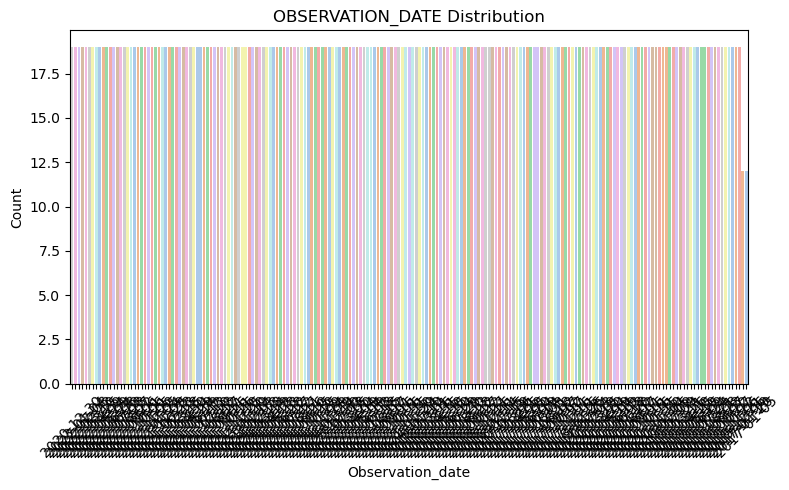

In [ ]:
inspect_qualitative_variable(tsdmdf, 'OBSERVATION_DATE')


=== TSDM ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 308.666667
Max              : 4945.333333
Mean             : 1296.33
Median           : 1160.00
Std. Deviation   : 588.43


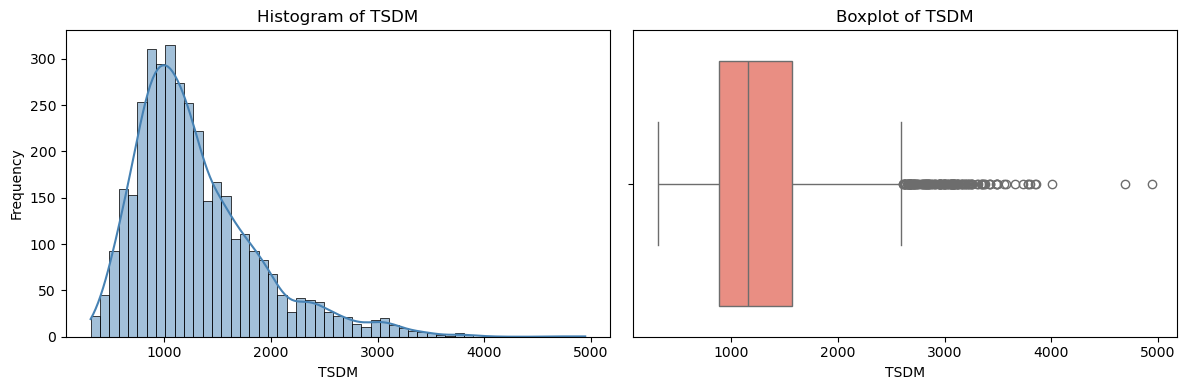

In [ ]:
inspect_quantitative_variable(tsdmdf, 'TSDM')


=== 15D_AVG_DAILY_RAIN ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 938
Min              : 0.0
Max              : 12.879999999999988
Mean             : 1.19
Median           : 0.29
Std. Deviation   : 1.94


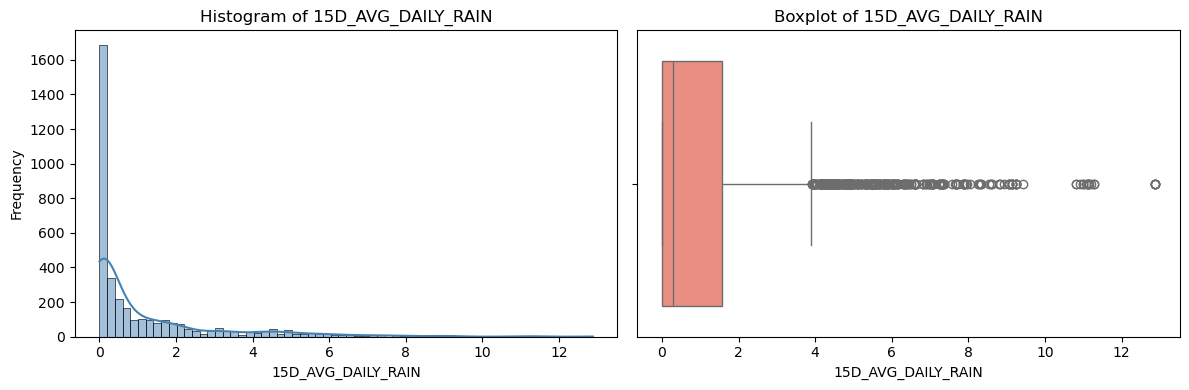

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_DAILY_RAIN')


=== 15D_AVG_MIN_TEMP ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 3.64
Max              : 25.85333333333334
Mean             : 15.39
Median           : 16.01
Std. Deviation   : 6.43


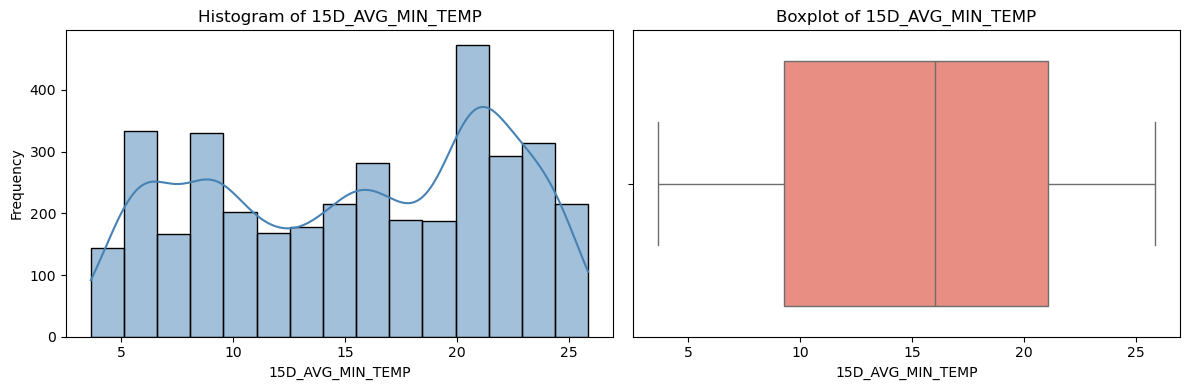

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_MIN_TEMP')


=== 15D_AVG_RH_TMAX ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 12.78
Max              : 58.13333333333333
Mean             : 31.48
Median           : 31.03
Std. Deviation   : 8.40


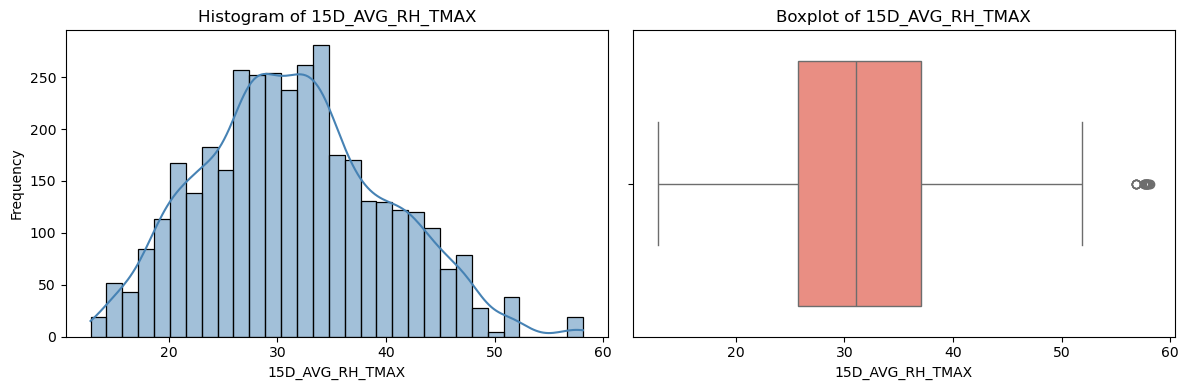

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_RH_TMAX')


=== 15D_AVG_RH_TMIN ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 37.39333333333333
Max              : 99.43333333333334
Mean             : 75.79
Median           : 76.39
Std. Deviation   : 13.77


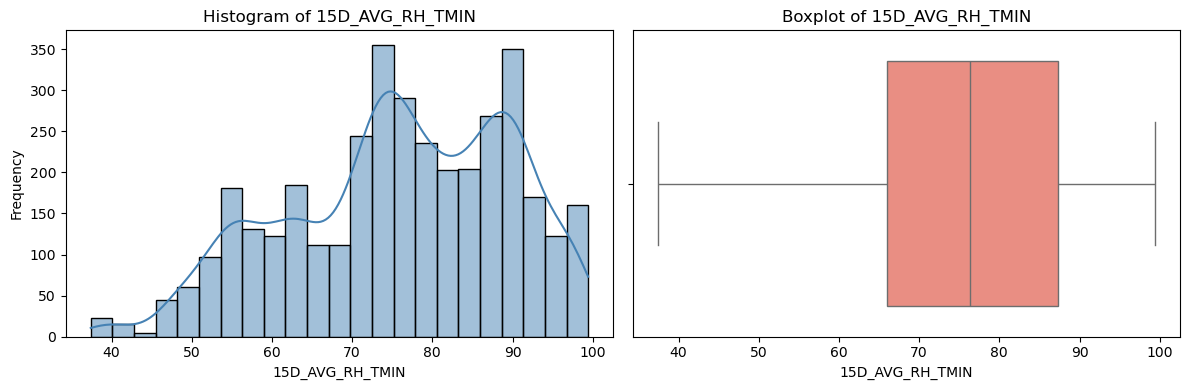

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_RH_TMIN')


=== 15D_AVG_EVAP_SYN ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 2.6
Max              : 13.473333333333333
Mean             : 7.01
Median           : 7.11
Std. Deviation   : 2.70


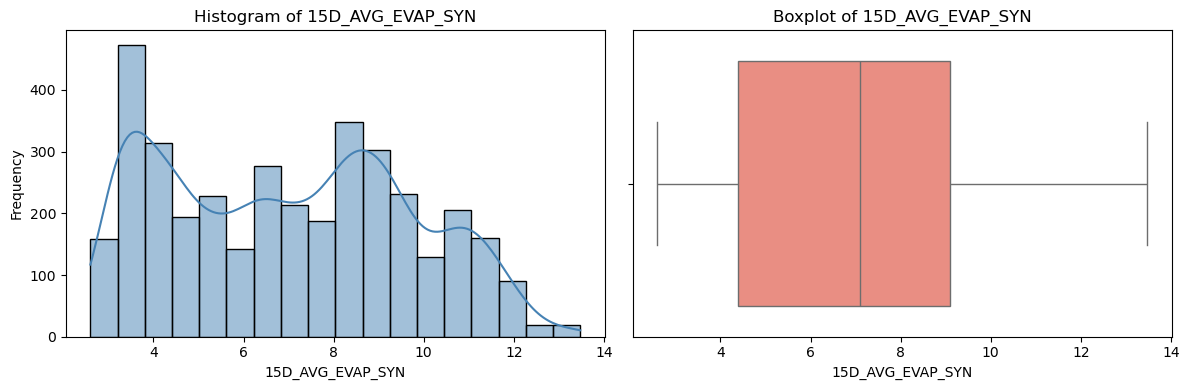

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_EVAP_SYN')


=== 15D_AVG_RADIATION ===
Total values     : 3691
Missing values   : 0
Negative values  : 0
Zero values      : 0
Min              : 10.94
Max              : 29.666666666666668
Mean             : 20.24
Median           : 20.45
Std. Deviation   : 4.53


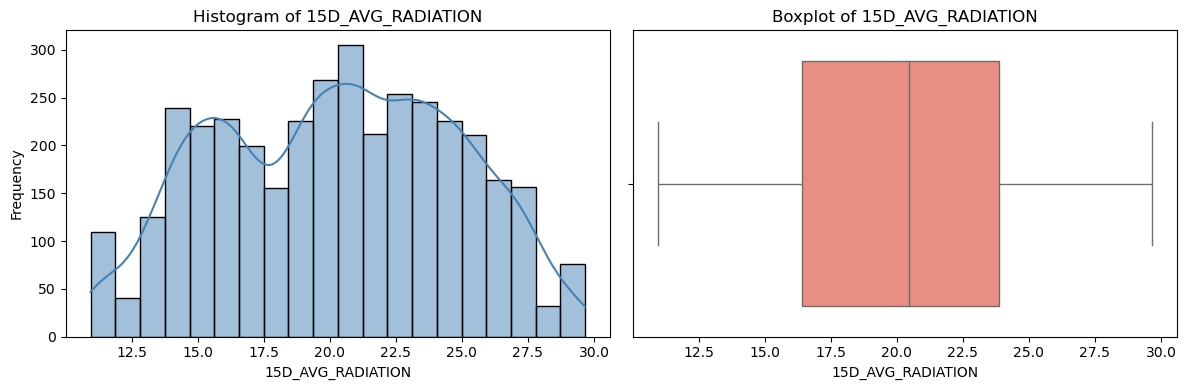

In [ ]:
inspect_quantitative_variable(tsdmdf, '15D_AVG_RADIATION')

In [ ]:
tsdmdf

,PADDOCK_ID,OBSERVATION_DATE,TSDM,15D_AVG_DAILY_RAIN,15D_AVG_MAX_TEMP,15D_AVG_MIN_TEMP,15D_AVG_RH_TMAX,15D_AVG_RH_TMIN,15D_AVG_EVAP_SYN,15D_AVG_RADIATION
0,352a2a92802487c32fa051f18f0fd7c53ef4b517d562a7...,2017-01-05,1837.000000,1.200000,35.360000,24.560000,41.420000,76.320000,8.500000,20.060000
1,352a2a92802487c32fa051f18f0fd7c53ef4b517d562a7...,2017-01-20,1837.000000,3.833333,36.233333,23.786667,38.580000,77.240000,9.326667,23.613333
2,352a2a92802487c32fa051f18f0fd7c53ef4b517d562a7...,2017-02-04,1554.666667,0.913333,37.886667,24.540000,35.753333,75.600000,10.026667,24.766667
3,352a2a92802487c32fa051f18f0fd7c53ef4b517d562a7...,2017-02-19,1006.666667,0.206667,39.360000,24.246667,27.766667,64.366667,10.646667,25.226667
4,352a2a92802487c32fa051f18f0fd7c53ef4b517d562a7...,2017-03-06,1060.000000,0.980000,35.866667,20.546667,31.026667,75.553333,8.706667,21.466667
...,...,...,...,...,...,...,...,...,...,...
3686,f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03f...,2024-10-25,1840.000000,0.000000,35.153333,19.293333,25.913333,65.560000,9.086667,24.760000
3687,f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03f...,2024-11-09,1664.666667,0.206667,37.713333,20.566667,20.320000,53.780000,10.853333,26.353333
3688,f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03f...,2024-11-24,1790.666667,5.306667,34.446667,21.633333,38.300000,78.286667,8.706667,23.013333
3689,f4bfb0920671ab818ebac30a7945b3a1ae8e75954ae03f...,2024-12-09,2131.666667,3.166667,34.406667,23.026667,44.146667,82.420000,8.946667,25.206667


In [ ]:
seq_counts = tsdmdf.groupby('PADDOCK_ID').size()
print(seq_counts.describe())

count     19.000000
mean     194.263158
std        0.991189
min      193.000000
25%      193.000000
50%      195.000000
75%      195.000000
max      195.000000
dtype: float64


In [ ]:
def create_sequences(sequence, lookback, forecast_horizon, target_col):
    T, num_features = sequence.shape
    X, y, lengths = [], [], []
    pad_vector = np.zeros((lookback, num_features))

    # Fixed-length lookback with pre-padding
    for t in range(1, T - forecast_horizon + 1):
        context = sequence[:t]
        if len(context) > lookback:
            context = context[-lookback:]

        padded_context = pad_vector.copy()
        padded_context[-len(context):] = context

        X.append(padded_context)
        y.append(sequence[t:t + forecast_horizon, target_col])
        lengths.append(min(len(context), lookback))

    return np.array(X), np.array(y), lengths


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

def data_prep(df, feature_columns, lookback, test_steps, target_col, forecast_horizon):
    X_all, y_all = [], []
    train_data = []
    test_data = []
    lengths_all = []

    all_train_values = []
    for _, group in df.groupby("PADDOCK_ID"):
        feature_values = group[feature_columns].values
        if len(feature_values) > lookback + test_steps:
            all_train_values.append(feature_values[:-test_steps])

    all_train_values = np.vstack(all_train_values)
    global_scaler = MinMaxScaler()
    global_scaler.fit(all_train_values)

    for paddock_id, group in df.groupby('PADDOCK_ID'):
        feature_values = group[feature_columns].values

        if len(feature_values) <= 194:
            continue

        train_sample = global_scaler.transform(feature_values[:-test_steps])
        test_sample  = global_scaler.transform(feature_values[-test_steps:])

        train_data.append((paddock_id, train_sample))
        test_data.append((paddock_id, test_sample, global_scaler))

        X_location, y_location, lengths = create_sequences(
            train_sample, lookback, forecast_horizon, target_col
        )

        X_all.append(X_location)
        y_all.append(y_location)
        lengths_all.append(lengths)

    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)
    lengths_all = np.concatenate(lengths_all, axis=0)

    X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], X_all.shape[2]))

    return (
        torch.Tensor(X_all),
        torch.Tensor(y_all),
        torch.Tensor(lengths_all),
        train_data,
        test_data,
    )


In [ ]:
lookback   = 5
forecast_horizon = 5
test_steps = 5
feature_columns = ['TSDM']  # univariate
target_col = feature_columns.index('TSDM')

X_5, y_5, lengths_5, train_d_5, test_d_5 = data_prep(
    tsdmdf, feature_columns, lookback, test_steps, target_col, forecast_horizon
)

print("Shape of input data after sequence creation:", X_5.shape)
print("Shape of targets after sequence creation:", y_5.shape)

Shape of input data after sequence creation: torch.Size([2220, 5, 1])
Shape of targets after sequence creation: torch.Size([2220, 5])


In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class MyLSTMNet(nn.Module):
    def __init__(self, num_features, hidden_layer_size, num_layers, output_size, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_layer_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, data, lengths):
        """
        Forward pass for variable-length LSTM input.
        - data: tensor [batch, time, features]
        - lengths: tensor of sequence lengths (for packing)
        """
        # Pack the input sequence so padded timesteps are ignored
        packed_data = pack_padded_sequence(
            data, lengths.cpu(), batch_first=True, enforce_sorted=False
        )

        # Pass through LSTM
        packed_output, (hn, cn) = self.lstm(packed_data)

        # Take the hidden state from the last layer (num_layers - 1)
        last_hidden = hn[-1]  # shape: [batch, hidden_layer_size]

        # Dropout + final fully connected layer to produce output
        out = self.dropout(last_hidden)
        out = self.fc(out)    # shape: [batch, output_size]
        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split

def train_predict_model(model, n_epochs, lr, X_all, y_all, lengths, validation_split, batch_size):
    # Split data into train and validation sets
    dataset = TensorDataset(X_all, y_all, lengths)
    val_size = int(len(dataset) * validation_split)
    train_size = len(dataset) - val_size
    train_set, val_set = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    print(f"The model has {sum(p.numel() for p in model.parameters() if p.requires_grad)} trainable parameters")

    train_loss_history = []
    val_loss_history = []

    best_val_loss = float('inf')
    best_model_state = None

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch, lengths_batch in train_loader:
            y_pred = model(X_batch, lengths_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation check every 100 epochs
        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                train_preds = model(X_all[train_set.indices], lengths[train_set.indices])
                train_loss = loss_fn(train_preds, y_all[train_set.indices]).item()

                val_preds = model(X_all[val_set.indices], lengths[val_set.indices])
                val_loss = loss_fn(val_preds, y_all[val_set.indices]).item()

                print(f"Epoch {epoch+1}: train loss {train_loss:.4f}, val loss {val_loss:.4f}")

                train_loss_history.append(train_loss)
                val_loss_history.append(val_loss)

                # Save best model
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_model_state = model.state_dict()

    # Restore best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return train_loss_history, val_loss_history, model


In [ ]:
import itertools, torch

# Parameter grid
hidden_sizes = [10, 20]
num_layers = [1, 2]
dropouts = [0.1, 0.2]
lrs = [0.001]
batch_sizes = [32, 64]

n_epochs = 200
validation_split = 0.2

best_val_loss = float('inf')
best_cfg = None

for hs, nl, do, lr, bs in itertools.product(hidden_sizes, num_layers, dropouts, lrs, batch_sizes):
    model = MyLSTMNet(
        num_features=X_5.shape[2],
        hidden_layer_size=hs,
        num_layers=nl,
        output_size=5,
        dropout_prob=do
    )

    train_hist, val_hist, _ = train_predict_model(
        model, n_epochs, lr, X_5, y_5, lengths_5, validation_split, bs
    )

    val_loss = val_hist[-1] if val_hist else float('inf')
    print(f"hs={hs}, nl={nl}, do={do}, lr={lr}, bs={bs} -> val_loss={val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_cfg = dict(hidden_size=hs, num_layers=nl, dropout=do, lr=lr, batch_size=bs)

print("Best parameters:", best_cfg, "with val_loss:", best_val_loss)


The model has 575 trainable parameters
Epoch 1: train loss 0.0140, val loss 0.0149
Epoch 101: train loss 0.0052, val loss 0.0050
hs=10, nl=1, do=0.1, lr=0.001, bs=32 -> val_loss=0.0050
The model has 575 trainable parameters
Epoch 1: train loss 0.1234, val loss 0.1257
Epoch 101: train loss 0.0055, val loss 0.0057
hs=10, nl=1, do=0.1, lr=0.001, bs=64 -> val_loss=0.0057
The model has 575 trainable parameters
Epoch 1: train loss 0.0432, val loss 0.0453
Epoch 101: train loss 0.0051, val loss 0.0056
hs=10, nl=1, do=0.2, lr=0.001, bs=32 -> val_loss=0.0056
The model has 575 trainable parameters
Epoch 1: train loss 0.0957, val loss 0.0986
Epoch 101: train loss 0.0056, val loss 0.0056
hs=10, nl=1, do=0.2, lr=0.001, bs=64 -> val_loss=0.0056
The model has 1455 trainable parameters
Epoch 1: train loss 0.0106, val loss 0.0108
Epoch 101: train loss 0.0050, val loss 0.0047
hs=10, nl=2, do=0.1, lr=0.001, bs=32 -> val_loss=0.0047
The model has 1455 trainable parameters
Epoch 1: train loss 0.0715, val lo

In [ ]:
# Optimal hyperparameters (from tuning)
hidden_layer_size = 10
num_layers = 2
dropout_prob = 0.2
lr = 0.001
batch_size = 32
n_epochs = 501
validation_split = 0.2

# Rebuild and train
num_features = X_5.shape[2]
output_size = 5

model_lstm_5 = MyLSTMNet(
    num_features=num_features,
    hidden_layer_size=hidden_layer_size,
    num_layers=num_layers,
    output_size=output_size,
    dropout_prob=dropout_prob
)
train_loss_history_5, val_loss_history_5, model_lstm_5 = train_predict_model(
    model_lstm_5,
    n_epochs,
    lr,
    X_5,
    y_5,
    lengths_5,
    validation_split,
    batch_size
)

The model has 1455 trainable parameters
Epoch 1: train loss 0.0130, val loss 0.0126
Epoch 101: train loss 0.0053, val loss 0.0047
Epoch 201: train loss 0.0049, val loss 0.0045
Epoch 301: train loss 0.0048, val loss 0.0045
Epoch 401: train loss 0.0047, val loss 0.0044
Epoch 501: train loss 0.0046, val loss 0.0043


In [ ]:
def vis_train_loss(train_loss_history, val_loss_history):
 epochs = range(0, n_epochs, 100)
 plt.plot(epochs, train_loss_history, label='Training Loss')
 plt.plot(epochs, val_loss_history, label='Validation Loss') # <-- add this
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.title('Loss Convergence')
 plt.legend()
 plt.grid()
 plt.show()

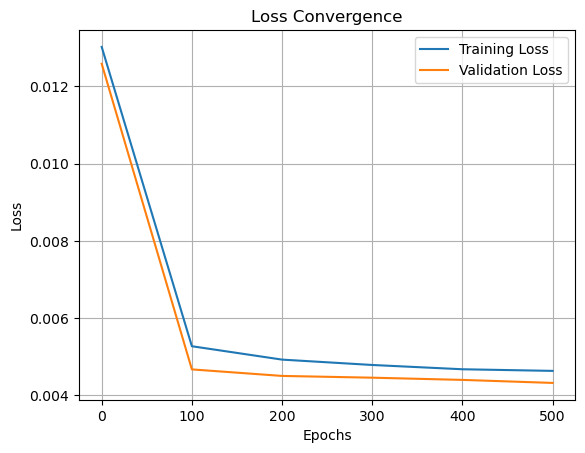

In [ ]:
vis_train_loss(train_loss_history_5, val_loss_history_5)


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def pred_eval(model, X, y, lengths, train_d, test_d, lookback, target_col):
    model.eval()
    with torch.no_grad():
        # Training metrics
        train_preds = model(X, lengths)
        print("Training RMSE:", root_mean_squared_error(y.flatten().tolist(),
                                                       train_preds.flatten().tolist()))
        print("Training R2:", r2_score(y.flatten().tolist(),
                                       train_preds.flatten().tolist()))


        X_test = []
        y_test = []
        lengths_test = []
        for count, (location_id, test_values, scaler) in enumerate(test_d):
            train_values = train_d[count][1]
            X_test.append(train_values[-lookback:])
            y_test.append(test_values[:, target_col])
            lengths_test.append(len(train_values[-lookback:]))

        X_test = torch.Tensor(np.array(X_test))
        y_test = torch.Tensor(np.array(y_test))
        lengths_test = torch.Tensor(lengths_test).long()

        # Predictions & test metrics
        test_preds = model(X_test, lengths_test)
        print("Test RMSE:", root_mean_squared_error(y_test.flatten().tolist(),
                                                    test_preds.flatten().tolist()))
        print("Test R2:", r2_score(y_test.flatten().tolist(),
                                   test_preds.flatten().tolist()))


        plt.figure(figsize=(10, 6))
        plt.plot(y_test.flatten().tolist(), label="Expected Value")
        plt.plot(test_preds.flatten().tolist(), label="Predicted Value")
        plt.grid()
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()


Training RMSE: 0.0676270218588672
Training R2: 0.5476054262361933
Test RMSE: 0.0792579323564593
Test R2: 0.23550312108874882


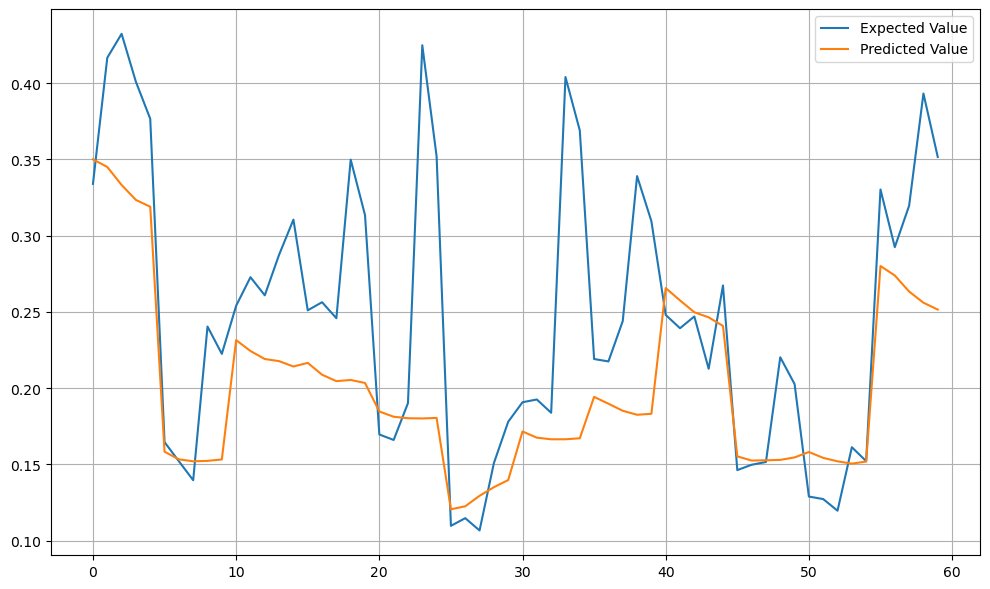

In [ ]:
lookback = 5
target_col = 0
pred_eval(model_lstm_5, X_5, y_5, lengths_5, train_d_5, test_d_5, lookback, target_col)

In [ ]:
lookback   = 10
forecast_horizon = 5
test_steps = 5
feature_columns = ['TSDM']  # univariate
target_col = feature_columns.index('TSDM')

X_10, y_10, lengths_10, train_d_10, test_d_10 = data_prep(
    tsdmdf, feature_columns, lookback, test_steps, target_col, forecast_horizon
)

print("Shape of input data after sequence creation:", X_10.shape)
print("Shape of targets after sequence creation:", y_10.shape)

Shape of input data after sequence creation: torch.Size([2220, 10, 1])
Shape of targets after sequence creation: torch.Size([2220, 5])


In [ ]:
# Optimal hyperparameters (from tuning)
hidden_layer_size = 10
num_layers = 2
dropout_prob = 0.2
lr = 0.001
batch_size = 32
n_epochs = 501
validation_split = 0.2

# Rebuild and train
num_features = X_10.shape[2]
output_size = 5

model_lstm_10 = MyLSTMNet(
    num_features=num_features,
    hidden_layer_size=hidden_layer_size,
    num_layers=num_layers,
    output_size=output_size,
    dropout_prob=dropout_prob
)
train_loss_history_10, val_loss_history_10, model_lstm_10 = train_predict_model(
    model_lstm_10,
    n_epochs,
    lr,
    X_10,
    y_10,
    lengths_10,
    validation_split,
    batch_size
)

The model has 1455 trainable parameters
Epoch 1: train loss 0.0101, val loss 0.0110
Epoch 101: train loss 0.0048, val loss 0.0050
Epoch 201: train loss 0.0046, val loss 0.0049
Epoch 301: train loss 0.0044, val loss 0.0047
Epoch 401: train loss 0.0043, val loss 0.0047
Epoch 501: train loss 0.0043, val loss 0.0047


In [ ]:
print(model_lstm_10)

MyLSTMNet(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=10, out_features=5, bias=True)
)


In [ ]:
n_epochs = 501
lr = 0.001
validation_split = 0.2
batch_size = 32

train_loss_history_10, val_loss_history_10, model_lstm_10 = train_predict_model(
    model_lstm_10,
    n_epochs,
    lr,
    X_10,
    y_10,
    lengths_10,
    validation_split,
    batch_size
)

The model has 1455 trainable parameters
Epoch 1: train loss 0.0044, val loss 0.0040
Epoch 101: train loss 0.0042, val loss 0.0041
Epoch 201: train loss 0.0040, val loss 0.0040
Epoch 301: train loss 0.0038, val loss 0.0038
Epoch 401: train loss 0.0036, val loss 0.0037
Epoch 501: train loss 0.0034, val loss 0.0037


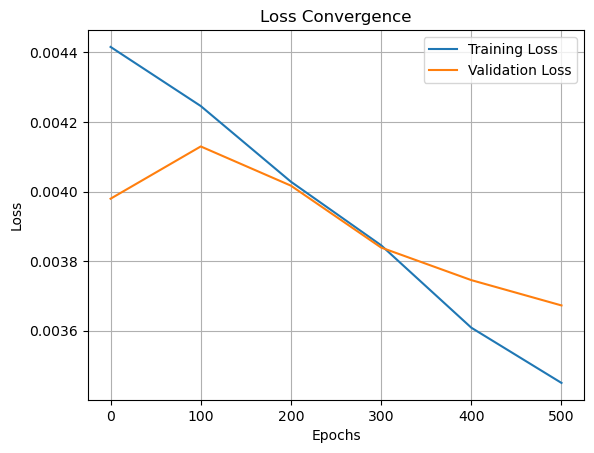

In [ ]:
vis_train_loss(train_loss_history_10, val_loss_history_10)

Training RMSE: 0.059114393262956866
Training R2: 0.6543286903700616
Test RMSE: 0.06348495850735963
Test R2: 0.5095080095233934


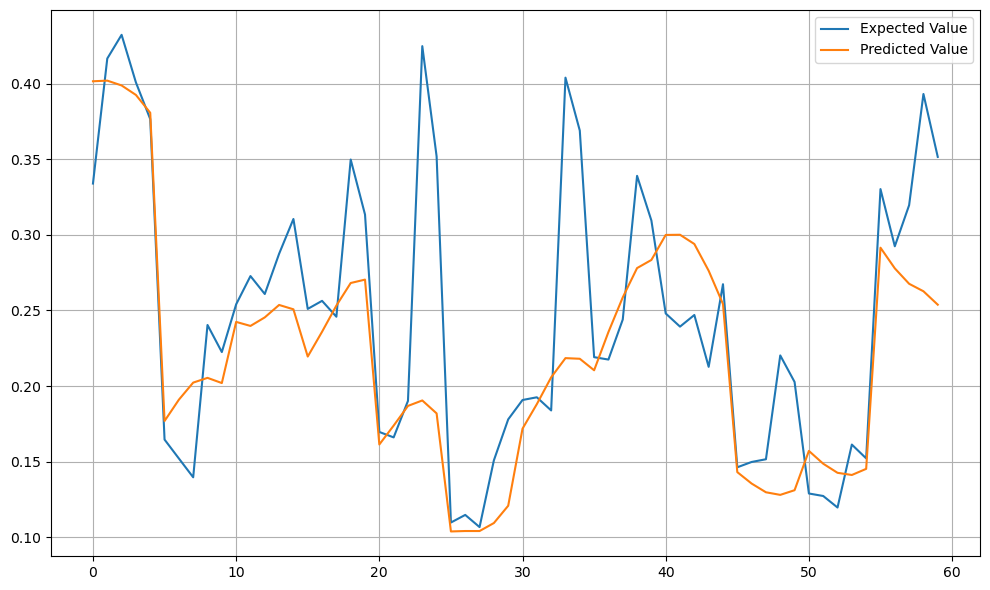

In [ ]:
lookback = 10
target_col = 0
pred_eval(model_lstm_10, X_10, y_10, lengths_10, train_d_10, test_d_10, lookback, target_col)

In [ ]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

def create_sequences_nonfixedlookback(sequence, lookback, forecast_horizon, target_col, pad_value=0.0):
    T, num_features = sequence.shape
    X, y, lengths = [], [], []

    if lookback > 0:
        pad_vector = np.zeros((lookback, num_features), dtype=np.float32)

        for t in range(1, T - forecast_horizon + 1):

            context = sequence[:t]
            if len(context) > lookback:
                context = context[-lookback:]


            padded_context = pad_vector.copy()
            padded_context[-len(context):] = context

            X.append(padded_context)
            y.append(sequence[t:t + forecast_horizon, target_col])
            lengths.append(min(len(context), lookback))

        return (np.array(X, dtype=np.float32),
                np.array(y, dtype=np.float32),
                np.array(lengths, dtype=np.int64))

    else:
        for t in range(1, T - forecast_horizon + 1):
            context = torch.tensor(sequence[:t], dtype=torch.float32)
            X.append(context)
            y.append(torch.tensor(sequence[t:t + forecast_horizon, target_col], dtype=torch.float32))
            lengths.append(len(context))

        X_padded = pad_sequence(X, batch_first=True, padding_value=float(pad_value))
        y_tensor = torch.stack(y)

        return (X_padded.numpy(),
                y_tensor.numpy(),
                np.array(lengths, dtype=np.int64))


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

def data_prep_nonfixedlookback(df, feature_columns, lookback, test_steps, target_col, forecast_horizon):
    X_all, y_all = [], []
    train_data = []
    test_data = []
    lengths_all = []

    all_train_values = []
    for _, group in df.groupby("PADDOCK_ID"):
        feature_values = group[feature_columns].values
        if len(feature_values) > lookback + test_steps:

            all_train_values.append(feature_values[:-test_steps])

    all_train_values = np.vstack(all_train_values)
    global_scaler = MinMaxScaler()
    global_scaler.fit(all_train_values)

    for paddock_id, group in df.groupby('PADDOCK_ID'):
        feature_values = group[feature_columns].values

        if len(feature_values) <= 194:
            continue

        train_sample = global_scaler.transform(feature_values[:-test_steps])
        test_sample  = global_scaler.transform(feature_values[-test_steps:])

        train_data.append((paddock_id, train_sample))
        test_data.append((paddock_id, test_sample, global_scaler))

        X_location, y_location, lengths = create_sequences_nonfixedlookback(
            train_sample, lookback, forecast_horizon, target_col
        )

        X_all.append(X_location)
        y_all.append(y_location)
        lengths_all.append(lengths)

    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)
    lengths_all = np.concatenate(lengths_all, axis=0)


    X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], X_all.shape[2]))

    return (
        torch.Tensor(X_all),
        torch.Tensor(y_all),
        torch.Tensor(lengths_all),
        train_data,
        test_data,
    )


In [ ]:
lookback   = 0 # dont restrict
forecast_horizon = 5
test_steps = 5
# multivairate (predict TSDM)
feature_columns = ['TSDM', '15D_AVG_DAILY_RAIN','15D_AVG_MAX_TEMP',
                   '15D_AVG_MIN_TEMP','15D_AVG_RH_TMAX','15D_AVG_RH_TMIN',
                   '15D_AVG_EVAP_SYN','15D_AVG_RADIATION']

target_col = feature_columns.index('TSDM')

X_m, y_m,lengths_m, train_d_m, test_d_m = data_prep_nonfixedlookback(
    tsdmdf, feature_columns, lookback, test_steps, target_col, forecast_horizon
)


print("Shape of input data after sequence creation:", X_m.shape)
print("Shape of targets after sequence creation:", y_m.shape)

Shape of input data after sequence creation: torch.Size([2220, 185, 8])
Shape of targets after sequence creation: torch.Size([2220, 5])


In [ ]:
# Optimal hyperparameters (from tuning)
hidden_layer_size = 10
num_layers = 2
dropout_prob = 0.2
lr = 0.001
batch_size = 32
n_epochs = 501
validation_split = 0.2

# Rebuild and train
num_features = X_m.shape[2]
output_size = test_steps

model_lstm_m = MyLSTMNet(
    num_features=num_features,
    hidden_layer_size=hidden_layer_size,
    num_layers=num_layers,
    output_size=output_size,
    dropout_prob=dropout_prob
)
train_loss_history_m, val_loss_history_m, model_lstm_m = train_predict_model(
    model_lstm_m,
    n_epochs,
    lr,
    X_m,
    y_m,
    lengths_m,
    validation_split,
    batch_size
)

The model has 1735 trainable parameters
Epoch 1: train loss 0.0105, val loss 0.0102
Epoch 101: train loss 0.0025, val loss 0.0027
Epoch 201: train loss 0.0017, val loss 0.0022
Epoch 301: train loss 0.0014, val loss 0.0017
Epoch 401: train loss 0.0013, val loss 0.0015
Epoch 501: train loss 0.0011, val loss 0.0014


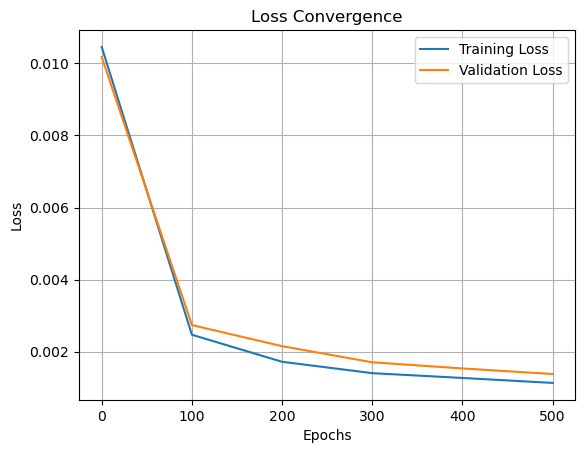

In [ ]:
vis_train_loss(train_loss_history_m, val_loss_history_m)

Training RMSE: 0.03437557227243047
Training R2: 0.8831101676050397
Test RMSE: 0.1330020268659542
Test R2: -1.1528152368724447


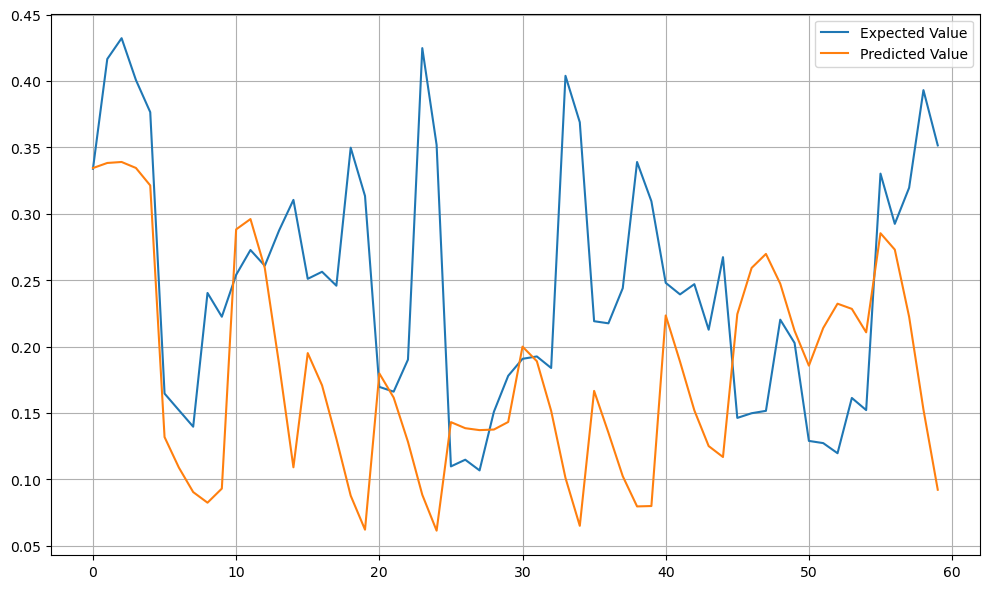

In [ ]:
target_col = 0
pred_eval(model_lstm_m, X_m, y_m, lengths_m, train_d_m, test_d_m, lookback, target_col)

#Task 4

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve
import torch
from transformers import BertweetTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding, EarlyStoppingCallback
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# hydrogen.csv hydrogen_small.csv kick.csv Prepare_SQuAD_tiny.ipynb tfidf_features.csv tfidf_features_small.csv tsdm.csv
df = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\hydrogen_small.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1000 non-null   object
 1   text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 4981 entries, aaa to 論文１
dtypes: float64(4981)
memory usage: 38.0 MB


In [ ]:
df["label"].unique()


array(['Relevant', 'Irrelevant'], dtype=object)

In [ ]:
df["text"].iloc[18]


'$nkla 👀⚡️🦄⚡️ hydrogen massive disruption is hurtling down the highway toward a $ trillion global truckingmarket as legacy manufacturers and new entrants alike grapple for pole position in a race for dominance in zero emissions trucks'

In [ ]:
def clean_message(text):
 # Remove URLs from the message. Match anything starting wtih "http", "https", or "www"
  # followed by any non-whitespace characters (\S).
 text = re.sub(r"http\S+|www\S+|https\S+", "", text)
 # Remove any tags from the message. Matches the '@' symbol followed by any letters,
 # numbers and underscores (\w).
 text = re.sub(r"@\w+", "", text)
 # Remove any non-ASCII characters from the text, such as emojis.
 # If you were dealing with a dataset containing non-English/Latin text, then you would
 # want to change this regular expression.
 text = re.sub(r"[^\x00-\x7F]+", "", text)
 # Replace any sequences of consecutive whitespace with a single space character.
 # This includes newlines and spaces.

 text = re.sub(r"\$(\w+)", r"\1", text)
 # Normalize cashtags by removing the '$' but keeping the company name

 text = re.sub(r"\s+", " ", text)
 # Finally, remove any leading or trailing whitespace with the strip() function.
 return text.strip()



In [ ]:
df["text"] = df["text"].apply(clean_message)

In [ ]:
df["text"].iloc[18]

'nkla hydrogen massive disruption is hurtling down the highway toward a $ trillion global truckingmarket as legacy manufacturers and new entrants alike grapple for pole position in a race for dominance in zero emissions trucks'

In [ ]:
df["label"] = df["label"].map({
 'Irrelevant': 0, # Negative = 0
 'Relevant': 1 # Positive = 1
})


In [ ]:
df["label"].unique()

array([1, 0], dtype=int64)

In [ ]:
df[df["label"] == 0].head(5)

,label,text
1,0,mls measurements of stratospheric hydrogen cya...
8,0,the cave nebula in hydrogen oxygen and sulfur ...
10,0,daytradingz smoke drifts up right now from the...
15,0,good day everyone how is that science coming a...
17,0,there s no rainbow trout on mars yvon chouinar...


In [ ]:
df[df["label"] == 1].head(5)

,label,text
0,1,behind the wheel of a hydrogen powered car
2,1,ana gonzalez hernandez shares an overview of h...
3,1,toyota is giving away its first hydrogen car i...
4,1,agility develops storage systems for hydrogen ...
5,1,we are diversifying our energy basket with gas...


In [ ]:
df["label"].value_counts()

label
1    547
0    453
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df["text"].values
y = df["label"].values

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=random_state
)
print("Training size:", len(X_train))
print("Testing size:", len(X_test))

Training size: 800
Testing size: 200


In [ ]:
df_hydro = pd.DataFrame({"text": X, "label": y})
df_hydro["label"].value_counts()

label
1    547
0    453
Name: count, dtype: int64

In [ ]:
train_df = pd.DataFrame({"text": X_train, "label": y_train})
test_df = pd.DataFrame({"text": X_test, "label": y_test})
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

In [ ]:
print("Train dataset:", train_ds)
print("Test dataset:", test_ds)

Train dataset: Dataset({
    features: ['text', 'label'],
    num_rows: 800
})
Test dataset: Dataset({
    features: ['text', 'label'],
    num_rows: 200
})


In [ ]:
model_name = "vinai/bertweet-base"
tokenizer = BertweetTokenizer.from_pretrained(model_name)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
# Function that is applied to all samples in the dataset.
def tokenize(batch):
 # We set truncation=True to truncate (cut off) messages that are too long.
 # NOTE: Not all models require this, you may get a warning indicating that it has no effect.
 # Padding is set to True if the model requires a fixed sequence length.
 return tokenizer(batch['text'], truncation=True, padding=True)
# Apply to both the training and testing datasets.
# We set batched to True which can enable parallel processing, however on my machine I found
# it did not scale to a greater number of threads.
train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
train_ds

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 800
})

In [ ]:
# Ensure the resources for any existing model has been freed.
try:
 del model
except NameError:
 pass
# Download/load the base model. We use the "vinai/bertweet-base" model here.
# Set the number of labels to the number of unique labels in the dataframe, which is 2.
# Set the problem type to single label classification, since we want one class for each sample.
modelBERTweet = RobertaForSequenceClassification.from_pretrained(
 model_name,
 num_labels=df_hydro["label"].nunique(),
 problem_type="single_label_classification")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 acc = accuracy_score(labels, preds)
 prec, recall, f1, _ = precision_recall_fscore_support(
 labels, preds, average="binary", pos_label=1)
 return {
 "accuracy": acc,
 "precision": prec,
 "recall": recall,
 "f1": f1
 }

In [ ]:
training_args = TrainingArguments(
 output_dir="./results",
 num_train_epochs=50,
 per_device_train_batch_size=16,
 per_device_eval_batch_size=64,
 eval_strategy="epoch",
 save_strategy="epoch",
 learning_rate=1e-5,
 weight_decay=0.01,
 logging_dir="./logs",
 logging_steps=10,
 # Added for early stopping.
 metric_for_best_model = "loss",
 load_best_model_at_end = True,
 seed = 42
)

In [ ]:
# Switch the model to training mode, enabling dropout etc layers.
modelBERTweet.train()
trainerBERTweet = Trainer(
 model=modelBERTweet,
 args=training_args,
 train_dataset=train_ds,
 eval_dataset=test_ds,
 processing_class=tokenizer,
 data_collator=DataCollatorWithPadding(tokenizer),
 compute_metrics=compute_metrics,
 callbacks = [EarlyStoppingCallback(early_stopping_patience=3)],
)
trainerBERTweet.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.504400,0.429622,0.855000,0.803030,0.972477,0.879668
2,0.197200,0.245062,0.925000,0.935185,0.926606,0.930876
3,0.149500,0.359561,0.885000,0.841270,0.972477,0.902128
4,0.125600,0.300646,0.920000,0.911504,0.944954,0.927928
5,0.052300,0.322527,0.925000,0.912281,0.954128,0.932735


TrainOutput(global_step=250, training_loss=0.25478175723552704, metrics={'train_runtime': 27.8518, 'train_samples_per_second': 1436.173, 'train_steps_per_second': 89.761, 'total_flos': 127444417440000.0, 'train_loss': 0.25478175723552704, 'epoch': 5.0})

In [ ]:
# Switch the model to evaluation mode, disabling dropout etc layers.
modelBERTweet.eval()
# Evaluate the datasets.
train_results = trainerBERTweet.evaluate(train_ds)
test_results = trainerBERTweet.evaluate(test_ds)

In [ ]:
def display_evaluation(setname, results):
 print(f"{setname} Set Accuracy:", round(results["eval_accuracy"], 3))
 print(f"{setname} Set Precision:", round(results["eval_precision"], 3))
 print(f"{setname} Set Recall:", round(results["eval_recall"], 3))
 print(f"{setname} Set F1 score:", round(results["eval_f1"], 3))
display_evaluation("Training", train_results)
display_evaluation("Testing", test_results)

Training Set Accuracy: 0.963
Training Set Precision: 0.97
Training Set Recall: 0.961
Training Set F1 score: 0.966
Testing Set Accuracy: 0.925
Testing Set Precision: 0.935
Testing Set Recall: 0.927
Testing Set F1 score: 0.931


In [ ]:
# Returns (matrix, tokens)
def compute_attention_matrix(tokenizer, model, text):
  # Feed into the model, you could also grab the token embedding directly
  # from the dataset, in which case this step would be unnecessary. We want
  # the output in Tensor format that we can feed to the model, so we use
  # return_tensors="pt" (PyTorch Tensor). Lastly, send the tensor to
  # whichever device the model is located on. This is unnecessary if you
  # are running purely on the CPU, but needed for models on GPUs.
  tokens = tokenizer(text, return_tensors="pt").to(model.device)
  # We use torch.no_grad() to ensure the weights in the model are unchanged.
  with torch.no_grad():
    pred = model(**tokens, output_attentions=True)
  # Stack layers. Depending on your model, this may have no effect.
  # Move it back to the GPU if it was previously on the GPU.
  attentions = torch.stack(pred.attentions).cpu()
  # Remove the batch dimension, as there is only a zero value there.
  attentions = attentions.squeeze(1)
  # Average over the transformer layers and heads.
  attentions = attentions.mean(dim=0).mean(dim=0)
  # attentions now contains a matrix of importance from every token to every
  # other token. e.g. if the message contained 10 tokens, it would be 10x10.
  # Select the predicted class.
  pred_class = pred.logits.cpu().argmax(-1).item()
  # Also return a string representation of the tokens in the message.
  # Plotting the integer token IDs would not be very meaningful.
  token_strs = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])
  return (attentions, pred_class, token_strs)

In [ ]:
#pred = trainer.predict(test_ds)

In [ ]:
# Convert to PyTorch tensor, apply softmax, and convert back to a numpy array.
# pred_probs_bertweet = torch.nn.functional.softmax(torch.Tensor(pred.predictions)).numpy()

In [ ]:
pred_bertweet = trainerBERTweet.predict(test_ds)
y_test = pred_bertweet.label_ids

probs_bertweet = torch.nn.functional.softmax(
    torch.tensor(pred_bertweet.predictions), dim=1
).numpy()

auc_bertweet = roc_auc_score(y_test, probs_bertweet[:, 1])
fpr_bertweet, tpr_bertweet, _ = roc_curve(y_test, probs_bertweet[:, 1])


In [ ]:
from sklearn.metrics import classification_report

y_true = pred_bertweet.label_ids  # true labels
y_pred = pred_bertweet.predictions.argmax(-1)  # predicted labels

print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.923     0.918        91
           1      0.935     0.927     0.931       109

    accuracy                          0.925       200
   macro avg      0.924     0.925     0.924       200
weighted avg      0.925     0.925     0.925       200



In [ ]:
model_name = "Twitter/twhin-bert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# Ensure the resources for any existing model has been freed.
try:
 del model
except NameError:
 pass
# Download/load the base model. We use the "vinai/bertweet-base" model here.
# Set the number of labels to the number of unique labels in the dataframe, which is 2.
# Set the problem type to single label classification, since we want one class for each sample.
modelTwHIN = AutoModelForSequenceClassification.from_pretrained(
 model_name,
 num_labels=df_hydro["label"].nunique(),
 problem_type="single_label_classification")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Twitter/twhin-bert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
 output_dir="./results",
 num_train_epochs=50,
 per_device_train_batch_size=16,
 per_device_eval_batch_size=64,
 eval_strategy="epoch",
 save_strategy="epoch",
 learning_rate=1e-5,
 weight_decay=0.01,
 logging_dir="./logs",
 logging_steps=10,
 # Added for early stopping.
 metric_for_best_model = "loss",
 load_best_model_at_end = True,
 seed=42
)

In [ ]:
# Switch the model to training mode, enabling dropout etc layers.
modelTwHIN.train()
trainerTwHIN = Trainer(
 model=modelTwHIN,
 args=training_args,
 train_dataset=train_ds,
 eval_dataset=test_ds,
 processing_class=tokenizer,
 data_collator=DataCollatorWithPadding(tokenizer),
 compute_metrics=compute_metrics,
 callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)
trainerTwHIN.train()

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.680200,0.639663,0.650000,0.656000,0.752294,0.700855
2,0.561400,0.533973,0.745000,0.773585,0.752294,0.762791
3,0.375700,0.501320,0.765000,0.803922,0.752294,0.777251
4,0.317300,0.561897,0.770000,0.773913,0.816514,0.794643
5,0.272400,0.697782,0.765000,0.742188,0.871560,0.801688
6,0.220800,0.637541,0.780000,0.787611,0.816514,0.801802


TrainOutput(global_step=300, training_loss=0.41855674982070923, metrics={'train_runtime': 618.8739, 'train_samples_per_second': 64.634, 'train_steps_per_second': 4.04, 'total_flos': 152933300928000.0, 'train_loss': 0.41855674982070923, 'epoch': 6.0})

In [ ]:
# Switch the model to evaluation mode, disabling dropout etc layers.
modelTwHIN.eval()
# Evaluate the datasets.
train_results = trainerTwHIN.evaluate(train_ds)
test_results = trainerTwHIN.evaluate(test_ds)

In [ ]:
def display_evaluation(setname, results):
 print(f"{setname} Set Accuracy:", round(results["eval_accuracy"], 3))
 print(f"{setname} Set Precision:", round(results["eval_precision"], 3))
 print(f"{setname} Set Recall:", round(results["eval_recall"], 3))
 print(f"{setname} Set F1 score:", round(results["eval_f1"], 3))
display_evaluation("Training", train_results)
display_evaluation("Testing", test_results)

Training Set Accuracy: 0.895
Training Set Precision: 0.936
Training Set Recall: 0.868
Training Set F1 score: 0.9
Testing Set Accuracy: 0.765
Testing Set Precision: 0.804
Testing Set Recall: 0.752
Testing Set F1 score: 0.777


In [ ]:
# Convert to PyTorch tensor, apply softmax, and convert back to a numpy array.
# pred_probs_twhin = torch.nn.functional.softmax(torch.Tensor(pred.predictions)).numpy()

In [ ]:
pred_twhin = trainerTwHIN.predict(test_ds)
probs_twhin = torch.nn.functional.softmax(
    torch.tensor(pred_twhin.predictions), dim=1
).numpy()

auc_twhin = roc_auc_score(y_test, probs_twhin[:, 1])
fpr_twhin, tpr_twhin, _ = roc_curve(y_test, probs_twhin[:, 1])

In [ ]:
import numpy as np
print("Means:", probs_bertweet[:,1].mean(), probs_twhin[:,1].mean())
print("Arrays equal?", np.allclose(probs_bertweet, probs_twhin))  # should be False

Means: 0.5370353 0.49565452
Arrays equal? False


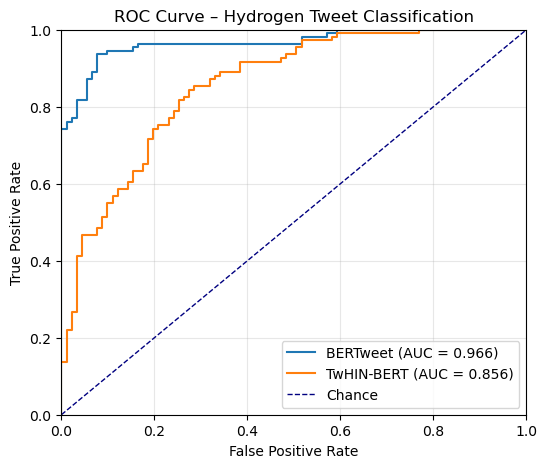

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr_bertweet, tpr_bertweet, label=f"BERTweet (AUC = {auc_bertweet:.3f})", lw=1.0)
plt.plot(fpr_twhin,    tpr_twhin,    label=f"TwHIN-BERT (AUC = {auc_twhin:.3f})", lw=1.0)
plt.plot([0,1],[0,1], linestyle="--", color="navy", lw=0.5)
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Hydrogen Tweet Classification")
plt.legend(loc="lower right"); plt.grid(alpha=0.3)
plt.show()

In [ ]:
def plot_attention(attentions, tokens, title):
 # Enlarge figure to take up more of the width.
 plt.figure(figsize=(10, 8))
 plt.title(title)
 # Plot heatmap.
 sns.heatmap(
 attentions, # Plot our attention matrix.
 xticklabels=tokens, # Display token names on X axis.
 yticklabels=tokens, # Display token names on Y axis.
 cmap='binary', # Black for low, white for high
 cbar=True # Display colour bar.
 )

 plt.show()

In [ ]:
def display_attention_matrix(tokenizer, model, text, pred_label):
    attention, pred_class, tokens = compute_attention_matrix(tokenizer, model, text)
    pred_label = pred_label
    plot_attention(attention, tokens, text + f"\nPredicted class: {pred_label}")

In [ ]:
tokenizerBT   = BertweetTokenizer.from_pretrained("vinai/bertweet-base")
tokenizerTWHIN = AutoTokenizer.from_pretrained("Twitter/twhin-bert-base")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


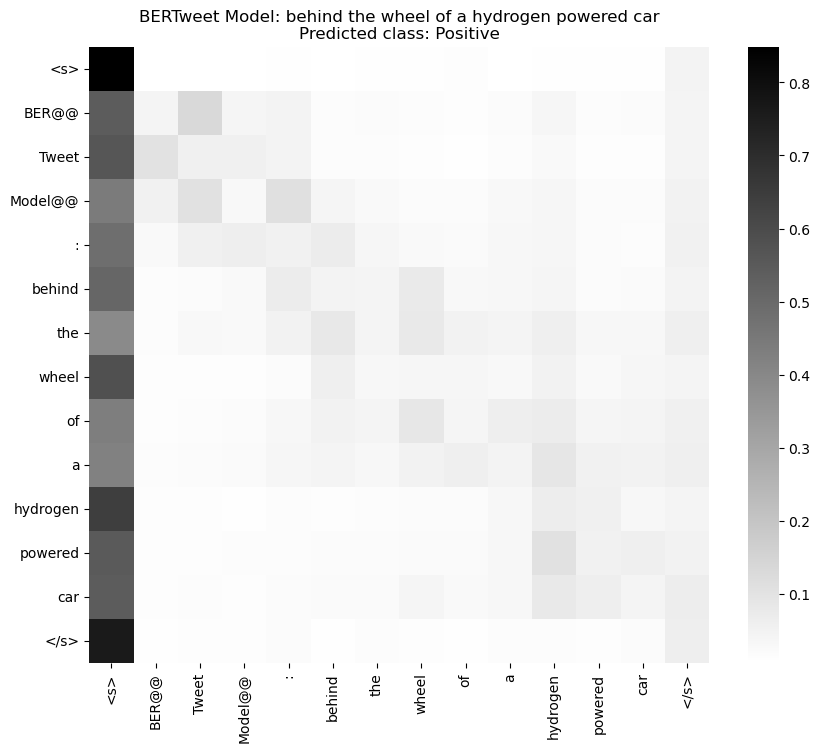

In [ ]:
display_attention_matrix(tokenizerBT, modelBERTweet, "BERTweet Model: " + df[df["label"] == 1].iloc[0]["text"], "Positive")

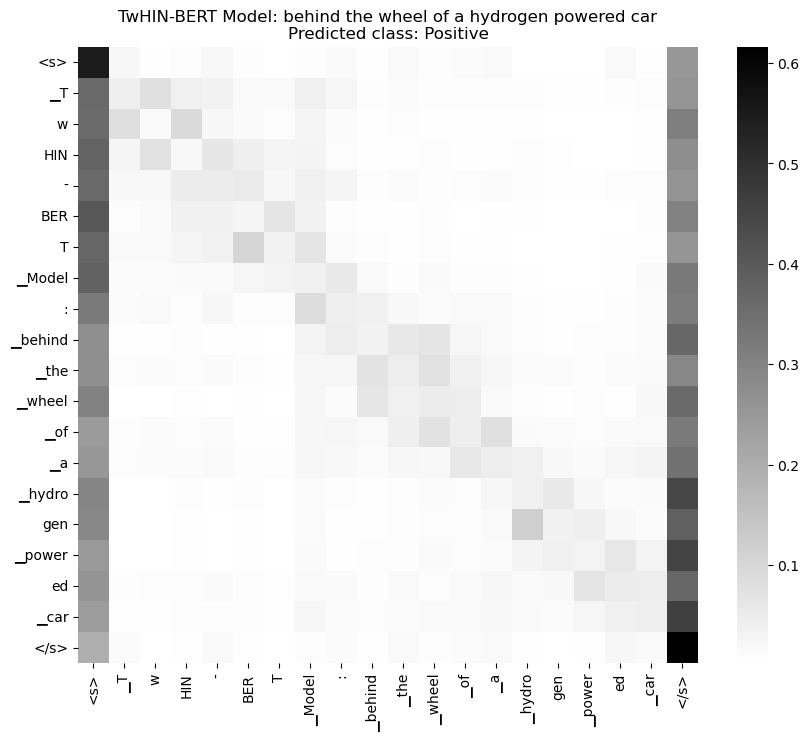

In [ ]:
display_attention_matrix(tokenizerTWHIN, modelTwHIN, "TwHIN-BERT Model: " + df[df["label"] == 1].iloc[0]["text"], "Positive")

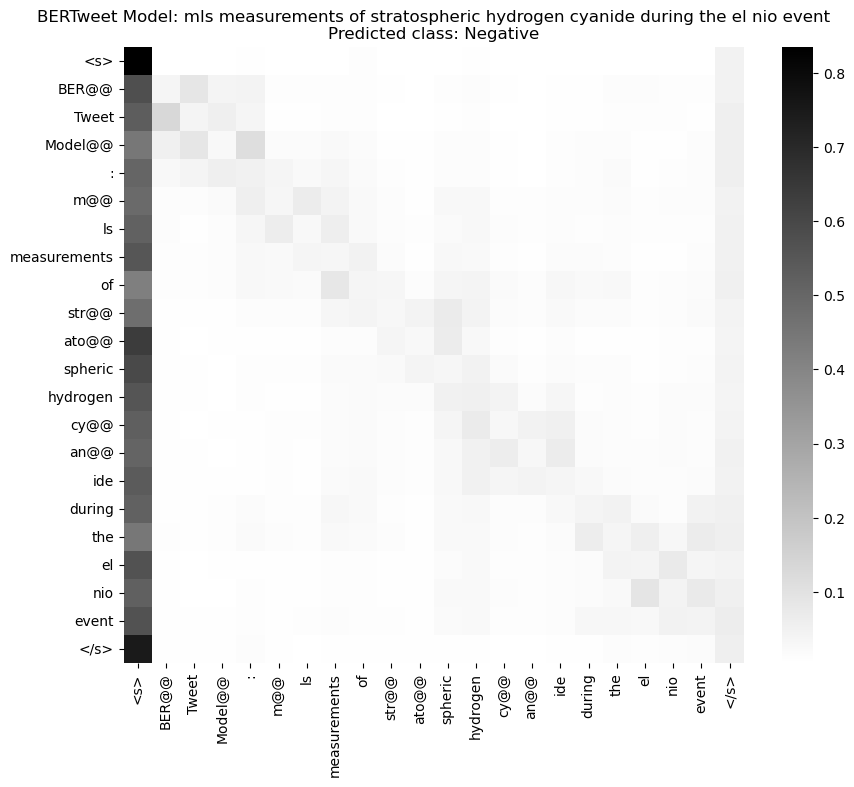

In [ ]:
display_attention_matrix(tokenizerBT, modelBERTweet, "BERTweet Model: " + df[df["label"] == 0].iloc[0]["text"], "Negative")

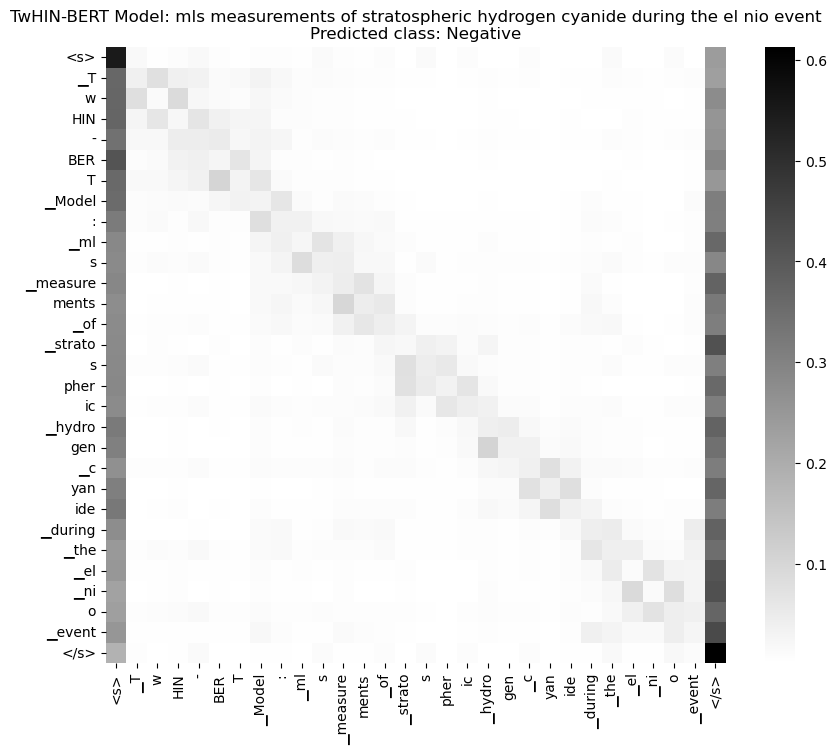

In [ ]:
display_attention_matrix(tokenizerTWHIN, modelTwHIN, "TwHIN-BERT Model: " + df[df["label"] == 0].iloc[0]["text"], "Negative")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support

tfidf = pd.read_csv(r'C:\Users\stevi\OneDrive\Desktop\Assignment 2\Datasets\tfidf_features_small.csv')
y = df_hydro['label'].astype(int).values
X = tfidf.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 800
Size of testing set: 200


In [ ]:
logreg = LogisticRegression(
    solver="lbfgs", #default
    penalty="l2", #default
    C=1.0, #default
    max_iter=100, #default
    random_state=42
)
logreg.fit(X_train, y_train)

print("\n=== Logistic Regression (TF-IDF) — baseline ===")
print("Train accuracy:", logreg.score(X_train, y_train))
print("Test  accuracy:", logreg.score(X_test, y_test))



=== Logistic Regression (TF-IDF) — baseline ===
Train accuracy: 0.99125
Test  accuracy: 0.91


In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.951     0.846     0.895        91
           1      0.882     0.963     0.921       109

    accuracy                          0.910       200
   macro avg      0.916     0.905     0.908       200
weighted avg      0.913     0.910     0.909       200



In [ ]:
# ROC-AUC
y_prob = logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob)
print("ROC-AUC (baseline):", round(auc, 3))

ROC-AUC (baseline): 0.964


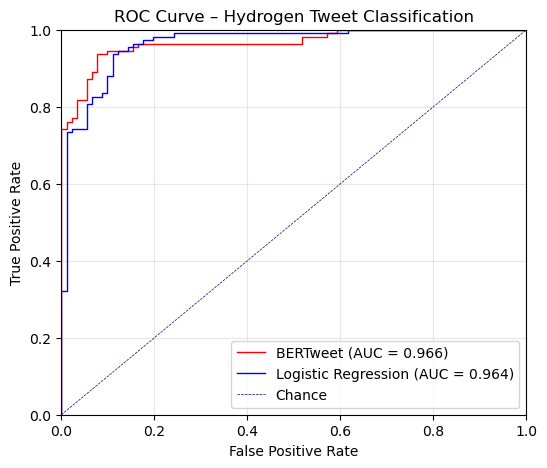

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(6, 5))

plt.plot(fpr_bertweet, tpr_bertweet,
         label=f"BERTweet (AUC = {auc_bertweet:.3f})",
         color='red', lw=1.0)

#plt.plot(fpr_twhin, tpr_twhin,
#        label=f"TwHIN-BERT (AUC = {auc_twhin:.3f})",
#        color='green', lw=1.0)

plt.plot(fpr_logreg, tpr_logreg,
         label=f"Logistic Regression (AUC = {auc:.3f})",
         color='blue', lw=1.0)

plt.plot([0, 1], [0, 1],
         linestyle='--', color='navy', lw=0.5, label='Chance')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Hydrogen Tweet Classification")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#Task 5

In [ ]:
import os
import torch
import pandas as pd
import numpy as np
from datasets import load_dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq, EarlyStoppingCallback, AutoTokenizer, AutoModelWithLMHead
from rouge_score import rouge_scorer
from tqdm import tqdm
from transformers import logging as transformers_logging

In [ ]:
# Set seed for reproducibility
torch.manual_seed(42)

In [ ]:
# 1. Load and preprocess SQuAD dataset
dataset = load_dataset("squad")

In [ ]:
print("Number of training examples:", len(dataset['train']))
dataset['train'][0]

Number of training examples: 87599


{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
# Take subsets to avoid overload
train_dataset = dataset["train"].select(range(10000,11000))
val_dataset = dataset["validation"].select(range(3000,3100))
test_dataset = dataset["validation"].select(range(3100, 3200))  # No official SQuAD test set

In [ ]:
print("Size of training set:", len(train_dataset))
print("Size of validation set:", len(val_dataset))
print("Size of testing set:", len(test_dataset))

Size of training set: 1000
Size of validation set: 100
Size of testing set: 100


In [ ]:
MODEL_NAME = "t5-small"
#MODEL_NAME = "t5-base"
MAX_INPUT_LENGTH = 512
MAX_OUTPUT_LENGTH = 128
# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def encode_question_and_context(question, context):
    return f"question: {question}  context: {context}"

# Obtains the context, question and answer from a given sample.
def extract_sample_parts(sample):
    context = sample["context"]
    question = sample["question"]
    answer = sample["answers"]['text'][0]
    question_with_context = encode_question_and_context(question, context)
    return (question_with_context, question, answer)

# Encodes the sample, returning token IDs.
def preprocess(sample):
    # Extract data from sample.
    question_with_context, question, answer = extract_sample_parts(sample)

    # Using truncation causes the tokenizer to emit a warning for every sample.
    # This will generate a significant amount of messages, and likely crash
    # your browser tab. We temporarily disable log messages to work around this.
    # See https://github.com/huggingface/transformers/issues/14285
    old_level = transformers_logging.get_verbosity()
    transformers_logging.set_verbosity_error()

    # Generate tokens for the input.
    # We include both the context and the question (first two parameters).
    input_tokens = tokenizer(question_with_context, question, padding="max_length",
                             truncation=True, max_length=MAX_INPUT_LENGTH)

    # Generate tokens for the expected answer. There is no need to include the
    output_tokens = tokenizer(answer, padding="max_length", truncation=True,
                              max_length=MAX_OUTPUT_LENGTH)

    # Restore old logging level, see above.
    transformers_logging.set_verbosity(old_level)

    # The output of the tokenizer is a map containing {input_ids, attention_mask}.
    # For trianing, we need to add the labels (answer/output tokens) to the map.
    input_tokens["labels"] = np.array(output_tokens["input_ids"])

    return input_tokens

In [ ]:
# Preprocess the datasets
training_set_enc = train_dataset.map(preprocess, batched=False)
validation_set_enc = val_dataset.map(preprocess, batched=False)
testing_set_enc = test_dataset.map(preprocess, batched=False)

In [ ]:
# Prepare 20 data points for qualitative analysis
test = testing_set_enc.select(range(20))
test

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 20
})

In [ ]:
# Prepare 20 data points for qualitative analysis
q_data = test_dataset.select(range(20))
q_data

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 20
})

In [ ]:
# Ensure the resources for any existing model has been freed.
try:
 del model
except NameError:
 pass
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)

In [ ]:
# We're interested in the input_ids (question/context tokens), attention mask,
# and labels (answer token IDs). Use PyTorch tensors for all three datasets.
columns = ["input_ids", "attention_mask", "labels"]
training_set_enc.set_format(type="torch", columns=columns)
validation_set_enc.set_format(type="torch", columns=columns)
testing_set_enc.set_format(type="torch", columns=columns)

In [ ]:
training_args = TrainingArguments(
 output_dir="./results",
 num_train_epochs=50,
 per_device_train_batch_size=8,
 per_device_eval_batch_size=8,
 eval_strategy="epoch",
 save_strategy="epoch",
 learning_rate=3e-4,
 weight_decay=0.01,
 save_total_limit=2,
 logging_dir="./logs",
 logging_steps=10,
 load_best_model_at_end=True,
 metric_for_best_model="eval_loss",
 greater_is_better=False
)

In [ ]:
# Switch the model to training mode, enabling dropout etc layers.
model.train()
trainer = Trainer(
 model=model,
 args=training_args,
 train_dataset=training_set_enc,
 eval_dataset=validation_set_enc,
 processing_class=tokenizer,
 data_collator=DataCollatorForSeq2Seq(tokenizer),
 callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)
trainer.train()


C:\Users\stevi\anaconda3\Lib\site-packages\transformers\data\data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.030400,0.023504
2,0.021800,0.021346
3,0.013800,0.021927
4,0.009800,0.021065
5,0.011000,0.024829
6,0.005300,0.026992
7,0.008700,0.029129


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=875, training_loss=0.10133057070204189, metrics={'train_runtime': 117.9833, 'train_samples_per_second': 423.789, 'train_steps_per_second': 52.974, 'total_flos': 947392610304000.0, 'train_loss': 0.10133057070204189, 'epoch': 7.0})

In [ ]:
def display_evaluation(setname, results):
 print(f"{setname} Set Loss:", round(results["eval_loss"], 3))

# Switch the model to evaluation mode, disabling dropout etc layers.
model.eval()
# Evaluate the datasets.
display_evaluation("Training", trainer.evaluate(training_set_enc))
display_evaluation("Testing", trainer.evaluate(testing_set_enc))


Training Set Loss: 0.004
Testing Set Loss: 0.024


In [ ]:
from itertools import batched
# Generates a response for a single input/question.
def generate_response(tokenizer, model, question):
 # Convert the sentences into a list of numeric tokens. We instruct the tokenizer
 # to return PyTorch tensors ("pt") so that we can feed them directly into the model.
 tokenized = tokenizer(question, return_tensors="pt", padding=True, truncation=True,
 max_length=MAX_OUTPUT_LENGTH).to(model.device)

 # Generate outputs using the model.
 with torch.no_grad():
  outputs = model.generate(**tokenized)
 # The model outputs a list of numeric tokens. To convert these tokens back to
 # sentences, we can use the batch_decode function from the tokenizer.
 outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)
 return outputs

# Generates a list of responses from the specified model, optionally including
# the context in the prompt. If limit is set, then answers will only be generated
# for the first N questions of the dataset.
def generate_answers(tokenizer, model, dataset, use_context=True, limit=None):
 # Subsampling if requested.
 if limit is not None:
  dataset = dataset.select(range(limit))
 # Create list of encoded tokens, similarly to how we preprocessed the data for
 # training. We do this so we can use batch processing to speed up inference.
 questions = []
 inputs = []
 references = []
 for sample in dataset:
  question_with_context, question, answer = extract_sample_parts(sample)
  # Only include the context if the caller requested it.
  if use_context:
    inputs.append(question_with_context)
  else:
    inputs.append(question)
  # Include the original question/answer.
  questions.append(question)
  references.append(answer)
 # Generate responses for each of the prompts/inputs.
 # Submitting each question to the model separately would significantly
 # increase processing time, especially if the model is located on the GPU.
 # Instead, we group questions together in the same batch size that we used
 # for training.
 outputs = []
 for samples in batched(inputs, 128):
  # Python's batched() function returns a tuple of the batch
  # size, which we have to first convert to a list.
  responses = generate_response(tokenizer, model, list(samples))
  # generate_responses() returns an equal-sized list of responses.
  outputs.extend(responses)
 # The length of the reference responses should equal the length of the
 # generated responses.
 assert (len(outputs) == len(references))
 return outputs, references, questions

In [ ]:
answers_ctx, refs_ctx, questions_ctx = generate_answers(
 tokenizer, model, test_dataset, True, 100)
answers_noctx, refs_noctx, questions_noctx = generate_answers(
 tokenizer, model, test_dataset, False, 100)

In [ ]:
def display_answer_and_references(question, answer, reference):
 print("Question:", question)
 print("Generated answer:", answer)
 print("Reference answer:", reference)
 print()
print("*** With context ***")
for i in range(3):
 display_answer_and_references(questions_ctx[i], answers_ctx[i],
 refs_ctx[i])
print("*** Without context ***")
for i in range(3):
 display_answer_and_references(questions_noctx[i],
 answers_noctx[i], refs_noctx[i])


*** With context ***
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: Dutch Republic
Reference answer: the Dutch Republic

Question: How many refugees emigrated to the Dutch Republic?
Generated answer: 75,000 to 100,000 people
Reference answer: an estimated total of 75,000 to 100,000 people

Question: What was the population of the Dutch Republic before this emigration?
Generated answer: ca. 2 million
Reference answer: ca. 2 million

*** Without context ***
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: 
Reference answer: the Dutch Republic

Question: How many refugees emigrated to the Dutch Republic?
Generated answer: 
Reference answer: an estimated total of 75,000 to 100,000 people

Question: What was the population of the Dutch Republic before this emigration?
Generated answer: Dutch Republic before emigration?
Reference answer: ca. 2 million



In [ ]:
# Computes the average score of a given metric from a list of ROUGE scores.
def compute_average_score(scores, metric, key):
 total = 0
 for i in range(len(scores)):
  # Since it's not a map, we have to manually read the attribute.
  total += getattr(scores[i][metric], key)
 return total / len(scores)
 # Computes ROGUE-1, ROGUE-2 and ROGUE-L scores for the given generated
# answers and reference answers.
def compute_rouge(predictions, references):
 # Compute ROUGE-1, ROGUE-2 and ROUGE-L.
 metrics = ["rouge1", "rouge2", "rougeL"]

 # Use Porter stemmer to strip word suffixes to improve matching.
 scorer = rouge_scorer.RougeScorer(metrics, use_stemmer=True)
 # For each answer/reference pair, compute the ROUGE metrics.
 scores = []
 for prediction, reference in zip(predictions, references):
  scores.append(scorer.score(reference, prediction))
 # Compute the average precision, recall and F1 score for each metric.
 results = {}
 for metric in metrics:
  for k in ["precision", "recall", "fmeasure"]:
    results[f"{metric}_{k}"] = compute_average_score(
    scores, metric, k)
 return results

In [ ]:
print("ROUGE with context:", compute_rouge(answers_ctx, refs_ctx))
print()
print("ROUGE without context:", compute_rouge(answers_noctx, refs_noctx))

ROUGE with context: {'rouge1_precision': 0.5599444444444445, 'rouge1_recall': 0.5276092796092796, 'rouge1_fmeasure': 0.5220051990493166, 'rouge2_precision': 0.3537121212121212, 'rouge2_recall': 0.3249722222222222, 'rouge2_fmeasure': 0.3276468253968254, 'rougeL_precision': 0.5599444444444445, 'rougeL_recall': 0.5276092796092796, 'rougeL_fmeasure': 0.5220051990493166}

ROUGE without context: {'rouge1_precision': 0.013075757575757576, 'rouge1_recall': 0.01926190476190476, 'rouge1_fmeasure': 0.014023809523809525, 'rouge2_precision': 0.0, 'rouge2_recall': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_precision': 0.013075757575757576, 'rougeL_recall': 0.01926190476190476, 'rougeL_fmeasure': 0.014023809523809525}


In [ ]:
context = """T5 is a series of large language models developed by Google AI introduced in
2019.
Like the original Transformer model, T5 models are encoder-decoder Transformers, where
the encoder processes the input text, and
the decoder generates the output text. T5 models are usually pretrained on a massive
dataset of text and code, after which they can
perform the text-based tasks that are similar to their pretrained tasks. They can also be
finetuned to perform other tasks.
T5 models have been employed in various applications, including chatbots, machine
translation systems, text summarization tools,
code generation, and robotics."""
question = "What was T5 pretrained on?"
question_and_context = encode_question_and_context(question, context)
print("Question:", question)
print("Answer:", generate_response(tokenizer, model, [question_and_context]))


Question: What was T5 pretrained on?
Answer: ['text and code']


In [ ]:
samples = test_dataset.select(range(5))

prompts_context = [
    encode_question_and_context(s["question"], s["context"])
    for s in samples
]

preds_context = generate_response(tokenizer, model, prompts_context)

for i, s in enumerate(samples):
    print("*With context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_context[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*With context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: Dutch Republic
Reference answer: the Dutch Republic

*With context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: 75,000 to 100,000 people
Reference answer: an estimated total of 75,000 to 100,000 people

*With context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: ca. 2 million
Reference answer: ca. 2 million

*With context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: 200 clergy
Reference answer: Amsterdam and the area of West Frisia

*With context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: Edict of Nantes
Reference answer: the revocation of the Edict of Nantes



In [ ]:
samples = test_dataset.select(range(5))

prompts_nocontext = [f"question: {s['question']}" for s in samples]
preds_nocontext = generate_response(tokenizer, model, prompts_nocontext)

for i, s in enumerate(samples):
    print("*No context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_nocontext[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*No context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: Huguenot
Reference answer: the Dutch Republic

*No context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: one
Reference answer: an estimated total of 75,000 to 100,000 people

*No context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: Dutch Republic
Reference answer: ca. 2 million

*No context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: Huguenots
Reference answer: Amsterdam and the area of West Frisia

*No context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: declaration
Reference answer: the revocation of the Edict of Nantes



In [ ]:
model_name = "MaRiOrOsSi/t5-base-finetuned-question-answering"
tokenizer = AutoTokenizer.from_pretrained(model_name)
modefinetuned = AutoModelWithLMHead.from_pretrained(model_name)
question = "What is 42?"
context = "42 is the answer to life, the universe and everything"
input = f"question: {question} context: {context}"
encoded_input = tokenizer([input],
                             return_tensors='pt',
                             max_length=512,
                             truncation=True)
output = modefinetuned.generate(input_ids = encoded_input.input_ids,
                            attention_mask = encoded_input.attention_mask)
output = tokenizer.decode(output[0], skip_special_tokens=True)
print(output)

C:\Users\stevi\anaconda3\Lib\site-packages\transformers\models\auto\modeling_auto.py:1949: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


The answer to life, the universe, and everything in it's entirety.


In [ ]:
answers_ctx, refs_ctx, questions_ctx = generate_answers(
 tokenizer, modefinetuned, test_dataset, True, 100)
answers_noctx, refs_noctx, questions_noctx = generate_answers(
 tokenizer, modefinetuned, test_dataset, False, 100)

In [ ]:
print("ROUGE with context:", compute_rouge(answers_ctx, refs_ctx))
print()
print("ROUGE without context:", compute_rouge(answers_noctx, refs_noctx))

ROUGE with context: {'rouge1_precision': 0.6655119047619046, 'rouge1_recall': 0.6047249694749695, 'rouge1_fmeasure': 0.6204054834054833, 'rouge2_precision': 0.40399999999999997, 'rouge2_recall': 0.34788888888888886, 'rouge2_fmeasure': 0.3636336996336996, 'rougeL_precision': 0.6655119047619046, 'rougeL_recall': 0.6047249694749695, 'rougeL_fmeasure': 0.6204054834054833}

ROUGE without context: {'rouge1_precision': 0.04310353535353535, 'rouge1_recall': 0.04003571428571428, 'rouge1_fmeasure': 0.03820194511370981, 'rouge2_precision': 0.0, 'rouge2_recall': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_precision': 0.04060353535353536, 'rougeL_recall': 0.03860714285714286, 'rougeL_fmeasure': 0.03638376329552799}


In [ ]:
samples = test_dataset.select(range(5))

prompts_context = [
    encode_question_and_context(s["question"], s["context"])
    for s in samples
]

preds_context = generate_response(tokenizer, modefinetuned, prompts_context)

for i, s in enumerate(samples):
    print("*With context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_context[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*With context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: Dutch Republic
Reference answer: the Dutch Republic

*With context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: 75,000- 100,000
Reference answer: an estimated total of 75,000 to 100,000 people

*With context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: 2 million
Reference answer: ca. 2 million

*With context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: Cévennes and Franissinet-de-Lozère
Reference answer: Amsterdam and the area of West Frisia

*With context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: Edict of Nantes
Reference answer: the revocation of the Edict of Nantes



In [ ]:
samples = test_dataset.select(range(5))

prompts_nocontext = [f"question: {s['question']}" for s in samples]
preds_nocontext = generate_response(tokenizer, modefinetuned, prompts_nocontext)

for i, s in enumerate(samples):
    print("*No context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_nocontext[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*No context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: France
Reference answer: the Dutch Republic

*No context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: 700
Reference answer: an estimated total of 75,000 to 100,000 people

*No context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: Population of the Dutch Republic was about 75% before this emigration.
Reference answer: ca. 2 million

*No context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: The Andes and La Fronte
Reference answer: Amsterdam and the area of West Frisia

*No context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: Departure of Palestine
Reference answer: the revocation of the Edict of Nantes



In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_name = "mrm8488/t5-base-finetuned-squadv2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
modelsQuADv2 = AutoModelForSeq2SeqLM.from_pretrained(model_name)

question = "What is 42?"
context = "42 is the answer to life, the universe and everything"
input = f"question: {question} context: {context}"
encoded_input = tokenizer([input],
                             return_tensors='pt',
                             max_length=512,
                             truncation=True)
output = modelsQuADv2.generate(input_ids = encoded_input.input_ids,
                            attention_mask = encoded_input.attention_mask)
output = tokenizer.decode(output[0], skip_special_tokens=True)
print(output)

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


the answer to life, the universe and everything


In [ ]:
answers_ctx, refs_ctx, questions_ctx = generate_answers(
 tokenizer, modelsQuADv2, test_dataset, True, 100)
answers_noctx, refs_noctx, questions_noctx = generate_answers(
 tokenizer, modelsQuADv2, test_dataset, False, 100)

In [ ]:
samples = test_dataset.select(range(5))

prompts_context = [
    encode_question_and_context(s["question"], s["context"])
    for s in samples
]

preds_context = generate_response(tokenizer, modelsQuADv2, prompts_context)

for i, s in enumerate(samples):
    print("*With context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_context[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*With context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: Dutch Republic
Reference answer: the Dutch Republic

*With context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: multiply(n2,const_2)|
Reference answer: an estimated total of 75,000 to 100,000 people

*With context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: multiply(n0,n1)|subtract(n2,n0)|divide
Reference answer: ca. 2 million

*With context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: add(n2,const_1)|
Reference answer: Amsterdam and the area of West Frisia

*With context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: Edict of Nantes
Reference answer: the revocation of the Edict of Nantes



In [ ]:
samples = test_dataset.select(range(5))

prompts_nocontext = [f"question: {s['question']}" for s in samples]
preds_nocontext = generate_response(tokenizer, modelsQuADv2, prompts_nocontext)

for i, s in enumerate(samples):
    print("*No context*")
    print("Question:", s["question"])
    print("Generated answer:", preds_nocontext[i])
    print("Reference answer:", s["answers"]["text"][0])
    print()

*No context*
Question: What country initially received the largest number of Huguenot refugees?
Generated answer: lcm(n0,n1)|
Reference answer: the Dutch Republic

*No context*
Question: How many refugees emigrated to the Dutch Republic?
Generated answer: multiply(n0,const_100)|
Reference answer: an estimated total of 75,000 to 100,000 people

*No context*
Question: What was the population of the Dutch Republic before this emigration?
Generated answer: population
Reference answer: ca. 2 million

*No context*
Question: What two areas in the Republic were first to grant rights to the Huguenots?
Generated answer: the first to grant rights to the Huguenots?
Reference answer: Amsterdam and the area of West Frisia

*No context*
Question: What declaration predicated the emigration of Huguenot refugees?
Generated answer: declaration
Reference answer: the revocation of the Edict of Nantes

